In [1]:
%matplotlib inline
%load_ext autoreload
%config InlineBackend.figure_format = 'retina' # high res plotting
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd

# import os 
# import h5py

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-emkd3kbf because the default path (/home/debrown/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
import scipy
import seaborn as sns
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

fontprops = fm.FontProperties(size=18)

In [3]:
# Import from BirdSongToolbox
from BirdSongToolbox.import_data import ImportData
import BirdSongToolbox.free_epoch_tools as fet
from BirdSongToolbox.file_utility_functions import _load_pckl_data


In [4]:
from BirdSongToolbox.behave.behave_utils import event_array_maker_chunk, get_events_rasters, repeat_events


In [5]:
import sys

#file structure for /src
package_folder = '/home/debrown/Songbird-LFP-Paper/'
sys.path.append(package_folder)

In [6]:
# Import the new package made specifically for this analysis

from src.analysis.chunk_when_analysis_naive import load_pandas_from_pickle, all_when_label_instructions 
from src.analysis.chunk_when_analysis_naive import motif_length_dict, collaspse_folds

from src.analysis.ml_pipeline_utilities import all_bad_channels, all_drop_temps, all_label_instructions
from src.analysis.context_utility import birds_context_obj
from src.analysis.chunk_feature_dropping_pearson import best_bin_width, best_offset


In [7]:
import src.analysis.chunk_when_analysis_naive as cwan


In [8]:
# # Path to saving Figures

from src.utils.paths import FIGURES_DIR


In [9]:
# Designate the High Yield Days for Each Bird

z020_days = ['day-2016-06-03', 'day-2016-06-05']
z007_days = ['day-2016-09-10','day-2016-09-11']
z017_days = ['day-2016-06-19', 'day-2016-06-21']

In [10]:
# Data Source for Branch Point Anlaysis 
branch_analysis_path = "/home/debrown/branch_analysis_path"

# Data Source for Script Original Naive Onset Detection
onset_detection_path = '/home/debrown/onset_detection_results'


# z017


In [11]:
z017_bird_id = 'z017'

z017_holder = []
for index, z017_session in enumerate(z017_days):
    z017_composite_results = load_pandas_from_pickle(data_name="composite_results_run_2", bird_id=z017_bird_id, 
                                                     session=z017_session, source=onset_detection_path, verbose=True)
    z017_composite_results['session'] = f"Day {index +1}"
    z017_holder.append(z017_composite_results)
full_results_z017 = pd.concat(z017_holder, axis=0)


Loading from composite_results_run_2 Data to composite_results_run_2.pckl
Loading from composite_results_run_2 Data to composite_results_run_2.pckl


In [12]:
# Save the Motif Ledger
z017_election_results = _load_pckl_data(data_name="election_results_run_2", bird_id=z017_bird_id, session=z017_session, 
                                        source=onset_detection_path, verbose=True)

# Save the Motif Ledger
z017_stereotyped_starts = _load_pckl_data(data_name="stereotyped_starts_run_2", bird_id=z017_bird_id, session=z017_session, 
                                          source=onset_detection_path, verbose=True)


Loading from election_results_run_2 Data to election_results_run_2.pckl
Loading from stereotyped_starts_run_2 Data to stereotyped_starts_run_2.pckl


In [13]:
full_results_z017.head()

times Freq_band  Syllable session
0   0.400000       4-8         2   Day 1
1   3.566667       4-8         2   Day 1
2  29.433333       4-8         2   Day 1
3  -4.666667       4-8         2   Day 1
4  -0.700000       4-8         2   Day 1

# Import Relevant Data for z017

In [14]:
# How this should actually be imported
# from src.analysis.chunk_when_analysis_naive import all_when_label_instructions, motif_length_dict

# Bird's Default Class Labels
all_when_label_instructions = cwan.all_when_label_instructions 


# Make Motif Length Times for the analysis
motif_length_dict = cwan.motif_length_dict 

In [15]:
# Save the DataFrame of Onset Results
bird_id = "z017"
session = 'day-2016-06-19'

In [16]:


z017_day1_fmo = _load_pckl_data(data_name="full_motif_organized", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)

z017_day1_fms = _load_pckl_data(data_name="full_motif_starts", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)

# Save the Motif Ledger
motif_ledger = _load_pckl_data(data_name="motif_ledger_run_2", bird_id=bird_id,
                                    session=session, source=onset_detection_path, verbose=True)

Loading from full_motif_organized Data to full_motif_organized.pckl
Loading from full_motif_starts Data to full_motif_starts.pckl
Loading from motif_ledger_run_2 Data to motif_ledger_run_2.pckl


In [17]:
# Save the Motif Ledger
z017_absolute_relative_starts = _load_pckl_data(data_name="absolute_relative_starts_run_2", bird_id=bird_id,
                                               session=session, source=onset_detection_path, verbose=True)



Loading from absolute_relative_starts_run_2 Data to absolute_relative_starts_run_2.pckl


In [18]:
# Load branch_organized_1
z017_day1_bo1 = _load_pckl_data(data_name="branch_organized_1", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)
# Load branch_predictions_1
z017_day1_p1 = _load_pckl_data(data_name="branch_predictions_1", bird_id=bird_id, session=session, 
                               source=branch_analysis_path, verbose=True)
# Load branch_starts_1
z017_day1_bs1 = _load_pckl_data(data_name="branch_starts_1", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)

# Load branch_organized_2
z017_day1_bo2 = _load_pckl_data(data_name="branch_organized_2", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)
# Load branch_predictions_2
z017_day1_p2 = _load_pckl_data(data_name="branch_predictions_2", bird_id=bird_id, session=session, 
                               source=branch_analysis_path, verbose=True)
# Load branch_starts_2
z017_day1_bs2 = _load_pckl_data(data_name="branch_starts_2", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)


# Stats
z017_day1_stats6 = _load_pckl_data(data_name="syll_6_stats", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)

z017_day1_w6 = _load_pckl_data(data_name="max_with_6", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)
z017_day1_wo6 = _load_pckl_data(data_name="max_without_6", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)

z017_day1_stats7 = _load_pckl_data(data_name="syll_7_stats", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)

z017_day1_w7 = _load_pckl_data(data_name="max_with_7", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)
z017_day1_wo7 = _load_pckl_data(data_name="max_without_7", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)



Loading from branch_organized_1 Data to branch_organized_1.pckl
Loading from branch_predictions_1 Data to branch_predictions_1.pckl
Loading from branch_starts_1 Data to branch_starts_1.pckl
Loading from branch_organized_2 Data to branch_organized_2.pckl
Loading from branch_predictions_2 Data to branch_predictions_2.pckl
Loading from branch_starts_2 Data to branch_starts_2.pckl
Loading from syll_6_stats Data to syll_6_stats.pckl
Loading from max_with_6 Data to max_with_6.pckl
Loading from max_without_6 Data to max_without_6.pckl
Loading from syll_7_stats Data to syll_7_stats.pckl
Loading from max_with_7 Data to max_with_7.pckl
Loading from max_without_7 Data to max_without_7.pckl


# Import Relevant Branch Point Analysis For Subject

In [80]:
from scipy import stats

In [19]:
# Load Day 2
bird_id = "z017"
session = 'day-2016-06-21'


# Load branch_organized_1
z017_day2_bo1 = _load_pckl_data(data_name="branch_organized_1", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)
# Load branch_predictions_1
z017_day2_p1 = _load_pckl_data(data_name="branch_predictions_1", bird_id=bird_id, session=session, 
                               source=branch_analysis_path, verbose=True)
# Load branch_starts_1
z017_day2_bs1 = _load_pckl_data(data_name="branch_starts_1", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)

# Load branch_organized_2
z017_day2_bo2 = _load_pckl_data(data_name="branch_organized_2", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)
# Load branch_predictions_2
z017_day2_p2 = _load_pckl_data(data_name="branch_predictions_2", bird_id=bird_id, session=session, 
                               source=branch_analysis_path, verbose=True)
# Load branch_starts_2
z017_day2_bs2 = _load_pckl_data(data_name="branch_starts_2", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)


# Stats
z017_day2_stats6 = _load_pckl_data(data_name="syll_6_stats", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)

z017_day2_w6 = _load_pckl_data(data_name="max_with_6", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)
z017_day2_wo6 = _load_pckl_data(data_name="max_without_6", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)

z017_day2_stats7 = _load_pckl_data(data_name="syll_7_stats", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)

z017_day2_w7 = _load_pckl_data(data_name="max_with_7", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)
z017_day2_wo7 = _load_pckl_data(data_name="max_without_7", bird_id=bird_id, session=session, 
                                source=branch_analysis_path, verbose=True)



Loading from branch_organized_1 Data to branch_organized_1.pckl
Loading from branch_predictions_1 Data to branch_predictions_1.pckl
Loading from branch_starts_1 Data to branch_starts_1.pckl
Loading from branch_organized_2 Data to branch_organized_2.pckl
Loading from branch_predictions_2 Data to branch_predictions_2.pckl
Loading from branch_starts_2 Data to branch_starts_2.pckl
Loading from syll_6_stats Data to syll_6_stats.pckl
Loading from max_with_6 Data to max_with_6.pckl
Loading from max_without_6 Data to max_without_6.pckl
Loading from syll_7_stats Data to syll_7_stats.pckl
Loading from max_with_7 Data to max_with_7.pckl
Loading from max_without_7 Data to max_without_7.pckl


In [20]:
max_confidence = 80

results_holder = []
for sel_results, state in zip([z017_day1_w6, z017_day1_wo6], ["With Syllable 6", "Without Syllable 6"]):
#     sel_results = collaspse_folds(syll)
    sel_results_df = pd.DataFrame(sel_results/max_confidence, columns=['Maximum Values'])  # Make the DataFrame
    sel_results_df['State'] = state
    sel_results_df['Day'] = "Day 1"
#     sel_results_df['Syllable'] = label_instruct[syll_num]

    results_holder.append(sel_results_df)
    
for sel_results, state in zip([z017_day2_w6, z017_day2_wo6], ["With Syllable 6", "Without Syllable 6"]):
#     sel_results = collaspse_folds(syll)
    sel_results_df = pd.DataFrame(sel_results/max_confidence, columns=['Maximum Values'])  # Make the DataFrame
    sel_results_df['State'] = state
    sel_results_df['Day'] = "Day 2"
#     sel_results_df['Syllable'] = label_instruct[syll_num]

    results_holder.append(sel_results_df)
full_results_6 = pd.concat(results_holder, axis=0)

In [81]:
scipy.stats.ttest_ind(z017_day1_w6, z017_day1_wo6, equal_var = False, alternative="greater")

Ttest_indResult(statistic=28.03535541900005, pvalue=1.9773539869080268e-61)

(0.0, 1.0)

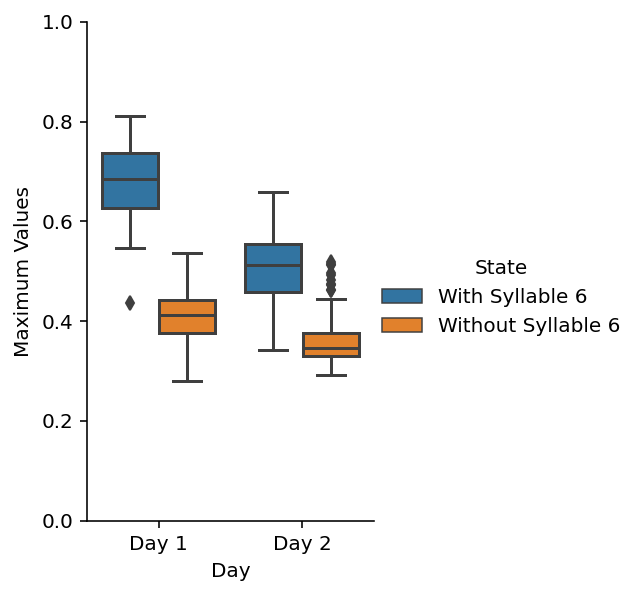

In [21]:
g = sns.catplot(x="Day", y="Maximum Values",
                hue="State",
                data=full_results_6, kind="box",
                height=4, aspect=.7);
plt.ylim(0,1)

In [22]:
max_confidence = 80

results_holder = []
for sel_results, state in zip([z017_day1_w7, z017_day1_wo7], ["With Syllable 7", "Without Syllable 7"]):
#     sel_results = collaspse_folds(syll)
    sel_results_df = pd.DataFrame(sel_results/max_confidence, columns=['Maximum Values'])  # Make the DataFrame
    sel_results_df['State'] = state
    sel_results_df['Day'] = "Day 1"
#     sel_results_df['Syllable'] = label_instruct[syll_num]

    results_holder.append(sel_results_df)
    
for sel_results, state in zip([z017_day2_w7, z017_day2_wo7], ["With Syllable 7", "Without Syllable 7"]):
#     sel_results = collaspse_folds(syll)
    sel_results_df = pd.DataFrame(sel_results/max_confidence, columns=['Maximum Values'])  # Make the DataFrame
    sel_results_df['State'] = state
    sel_results_df['Day'] = "Day 2"
#     sel_results_df['Syllable'] = label_instruct[syll_num]

    results_holder.append(sel_results_df)
full_results_7 = pd.concat(results_holder, axis=0)

In [82]:
scipy.stats.ttest_ind(z017_day1_w7, z017_day1_wo7, equal_var = False, alternative="greater")

Ttest_indResult(statistic=22.438111951255653, pvalue=3.0609468897221576e-33)

(0.0, 1.0)

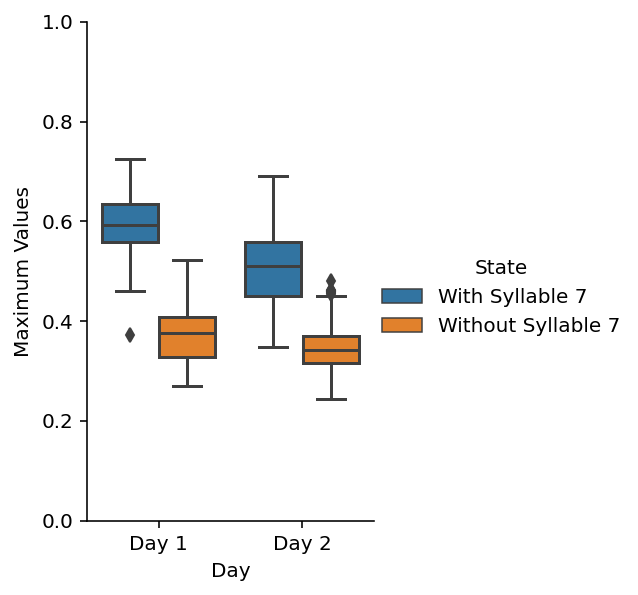

In [23]:
g = sns.catplot(x="Day", y="Maximum Values",
                hue="State",
                data=full_results_7, kind="box",
                height=4, aspect=.7);
plt.ylim(0,1)

## Copy over the spectrogram functions

In [24]:
import matplotlib 

In [25]:
# Copying the Spectrogram Function
def spectrogram(x, s_f, cut_off=1, window=None, n_perseg=None, n_overlap=None, sigma=0.3, nfft=None):
    if window is None:
        window = scipy.signal.gaussian(n_perseg, sigma)

    f, t, s = scipy.signal.spectrogram(np.transpose(x), fs=s_f, window=window,
                                       nperseg=n_perseg,
                                       noverlap=n_overlap,
                                       nfft=nfft,
                                       detrend='constant', return_onesided=True,
                                       scaling='density', axis=-1, mode='psd')

    # Apply Threshold to the Spectrogram
    s[s < cut_off] = cut_off

    return f, t, s

# From Zeke
def normalize(u, axis=0):
    # normalize to (0-1) along axis
    # (axis=0 to normalize every col to its max value, axis=0 to normalize every row to its max value)
    u_max = np.repeat(np.amax(u, axis=axis, keepdims=True), u.shape[axis], axis=axis)
    # print(u_max.shape)
    u_min = np.repeat(np.amin(u, axis=axis, keepdims=True), u.shape[axis], axis=axis)

    u_range = u_max - u_min
    u_range[u_range==0] = 1 # prevent nans, if range is zero set the value to 1.
    return (u - u_min)/u_range

# Adapted From Zeke
def my_spectrogram(Audio, s_f=30000, step_s=.001, window=None, n_perseg=192, f_cut=1, nfft=None, sigma=40):

    n_overlap = n_perseg - int(s_f * step_s)

    f, t, s = spectrogram(Audio, s_f=s_f, cut_off=f_cut, window=window, n_perseg=n_perseg, n_overlap=n_overlap,
                          sigma=sigma, nfft=nfft)

    s_normalized = normalize(np.log(s), axis=-1)
    return f, t, s_normalized

In [26]:
def plot_mean_w_std(trials, times, times_labels=None, color = 'green', linewidth= None,  ax=None):
    """
    trials: ndarray | (samples, trials) 
    times: ndarray | (samples,) 
    ax=None
    """
    
    mean_trace = np.mean(trials, axis=-1)
    std_trace = np.std(trials, ddof=1, axis=-1)

    
    if ax is None:
        plt.plot(times, mean_trace, color = color, linewidth=linewidth)
        plt.fill_between(x=times, y1=mean_trace +std_trace, y2=mean_trace-std_trace, color = color, alpha=.5)
        plt.ylim(0, max_len)

    else:
        ax.plot(times, mean_trace, color = color, linewidth=linewidth,)
        ax.fill_between(x=times, y1=mean_trace +std_trace, y2=mean_trace-std_trace, color = color, alpha=.8)

-----

In [27]:
# Save the DataFrame of Onset Results
bird_id = "z017"
session = 'day-2016-06-19'

In [28]:
# Import the Data
zdata = ImportData(bird_id=bird_id, session=session)

In [29]:
# Reshape Handlabels into Useful Format
chunk_labels_list, chunk_onsets_list = fet.get_chunk_handlabels(handlabels_list=zdata.song_handlabels)

In [30]:
motif_length = motif_length_dict[bird_id]



In [31]:
# Get the Bird Specific label Instructions
label_instructions = all_label_instructions[bird_id]  # get this birds default label instructions

times_of_interest = fet.label_extractor(all_labels=chunk_labels_list,
                                        starts=chunk_onsets_list[0],
                                        label_instructions=label_instructions)

In [32]:
# fet.event_clipper_nd()

clipped_audio_all = fet.event_clipper_nd(data= zdata.song_audio, label_events=times_of_interest, fs=30000, window=(0, motif_length))
clipped_audio = clipped_audio_all[0]

In [33]:
# Create timeseries representing the labeled Events For all Chunks
event_array_test2 = event_array_maker_chunk(labels_list=chunk_labels_list, onsets_list=chunk_onsets_list)


In [34]:
all_motif_behave = get_events_rasters(data=event_array_test2, indices=times_of_interest[0], fs=1000, 
                                  window=(0, motif_length))

In [35]:
# Get the Behavior for only the full Motifs
full_motif_behave = all_motif_behave[motif_ledger[7],:]
np.shape(full_motif_behave)

(52, 900)

In [36]:
len(motif_ledger[6])

79

In [37]:
# Get the Audio for only the full Motifs
full_motif_audio = clipped_audio[motif_ledger[7],:]
np.shape(full_motif_audio)




(52, 27000)

In [38]:
full_motif_starts = z017_day1_fms

full_motif_organized = z017_day1_fmo

In [39]:
# repeat_events??
def repeat_motif_events(labels_array, set_width=400):
    """ Repeat Instances for creating visualization of Behavior

    Parameters
    ----------
    labels_array : ndarray | (samples,)
        Array of the Events to be repeated for Visualization

    Returns
    -------
    set_array : ndarray | shape (400, Samples)
        Array of the Events ready for visualization
    """
    window_width = len(labels_array)  # Get the length of the Array
    num_repeats = set_width
    steps = np.arange(0, set_width)  
    set_array = np.zeros((set_width, window_width))  # Create Empty Array

    for inst in steps:
        set_array[inst, :] = labels_array
    return set_array

In [40]:
cmap2 = matplotlib.colors.ListedColormap(
    ['#000000', '#B66DFF', '#db6e00', '#009292', '#924900', '#006DDB', '#FFFF6D', 'white', '#B6DBFF' , '#490092'])
cmap2.set_over('cyan')
cmap2.set_under('#B6DBFF')
bounds = [.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
norm = matplotlib.colors.BoundaryNorm(bounds, cmap2.N)


In [41]:
# This isn't where max_confidence is first defined
max_confidence = 80
time_buffer = 50

In [42]:
subsize = 8
bigsize = 12
ticksize = 8
line_width = .5
line_width2= .5


In [43]:
selection = 15


sel_rel_starts = full_motif_starts[selection]
exemplar_predictions = full_motif_organized[selection, :,:]
sel_behave = full_motif_behave[selection,:]

sel_audio = full_motif_audio[selection,:]

f2, t2, s2 = my_spectrogram(sel_audio, f_cut=.5, nfft=200)



In [44]:
np.shape(full_motif_audio)

(52, 27000)

In [45]:
mask = (s2>.1) & (s2<.2)
s2[mask] = s2[mask]*3


In [46]:
mask = (s2>.2) & (s2<.5)
s2[mask] = s2[mask]*1.5


In [47]:
mask = (s2>.01) & (s2<.1)
s2[mask] = s2[mask]*5

In [48]:
mask = (s2>.001) & (s2<.01)
s2[mask] = s2[mask]*100

/home/debrown/anaconda3/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


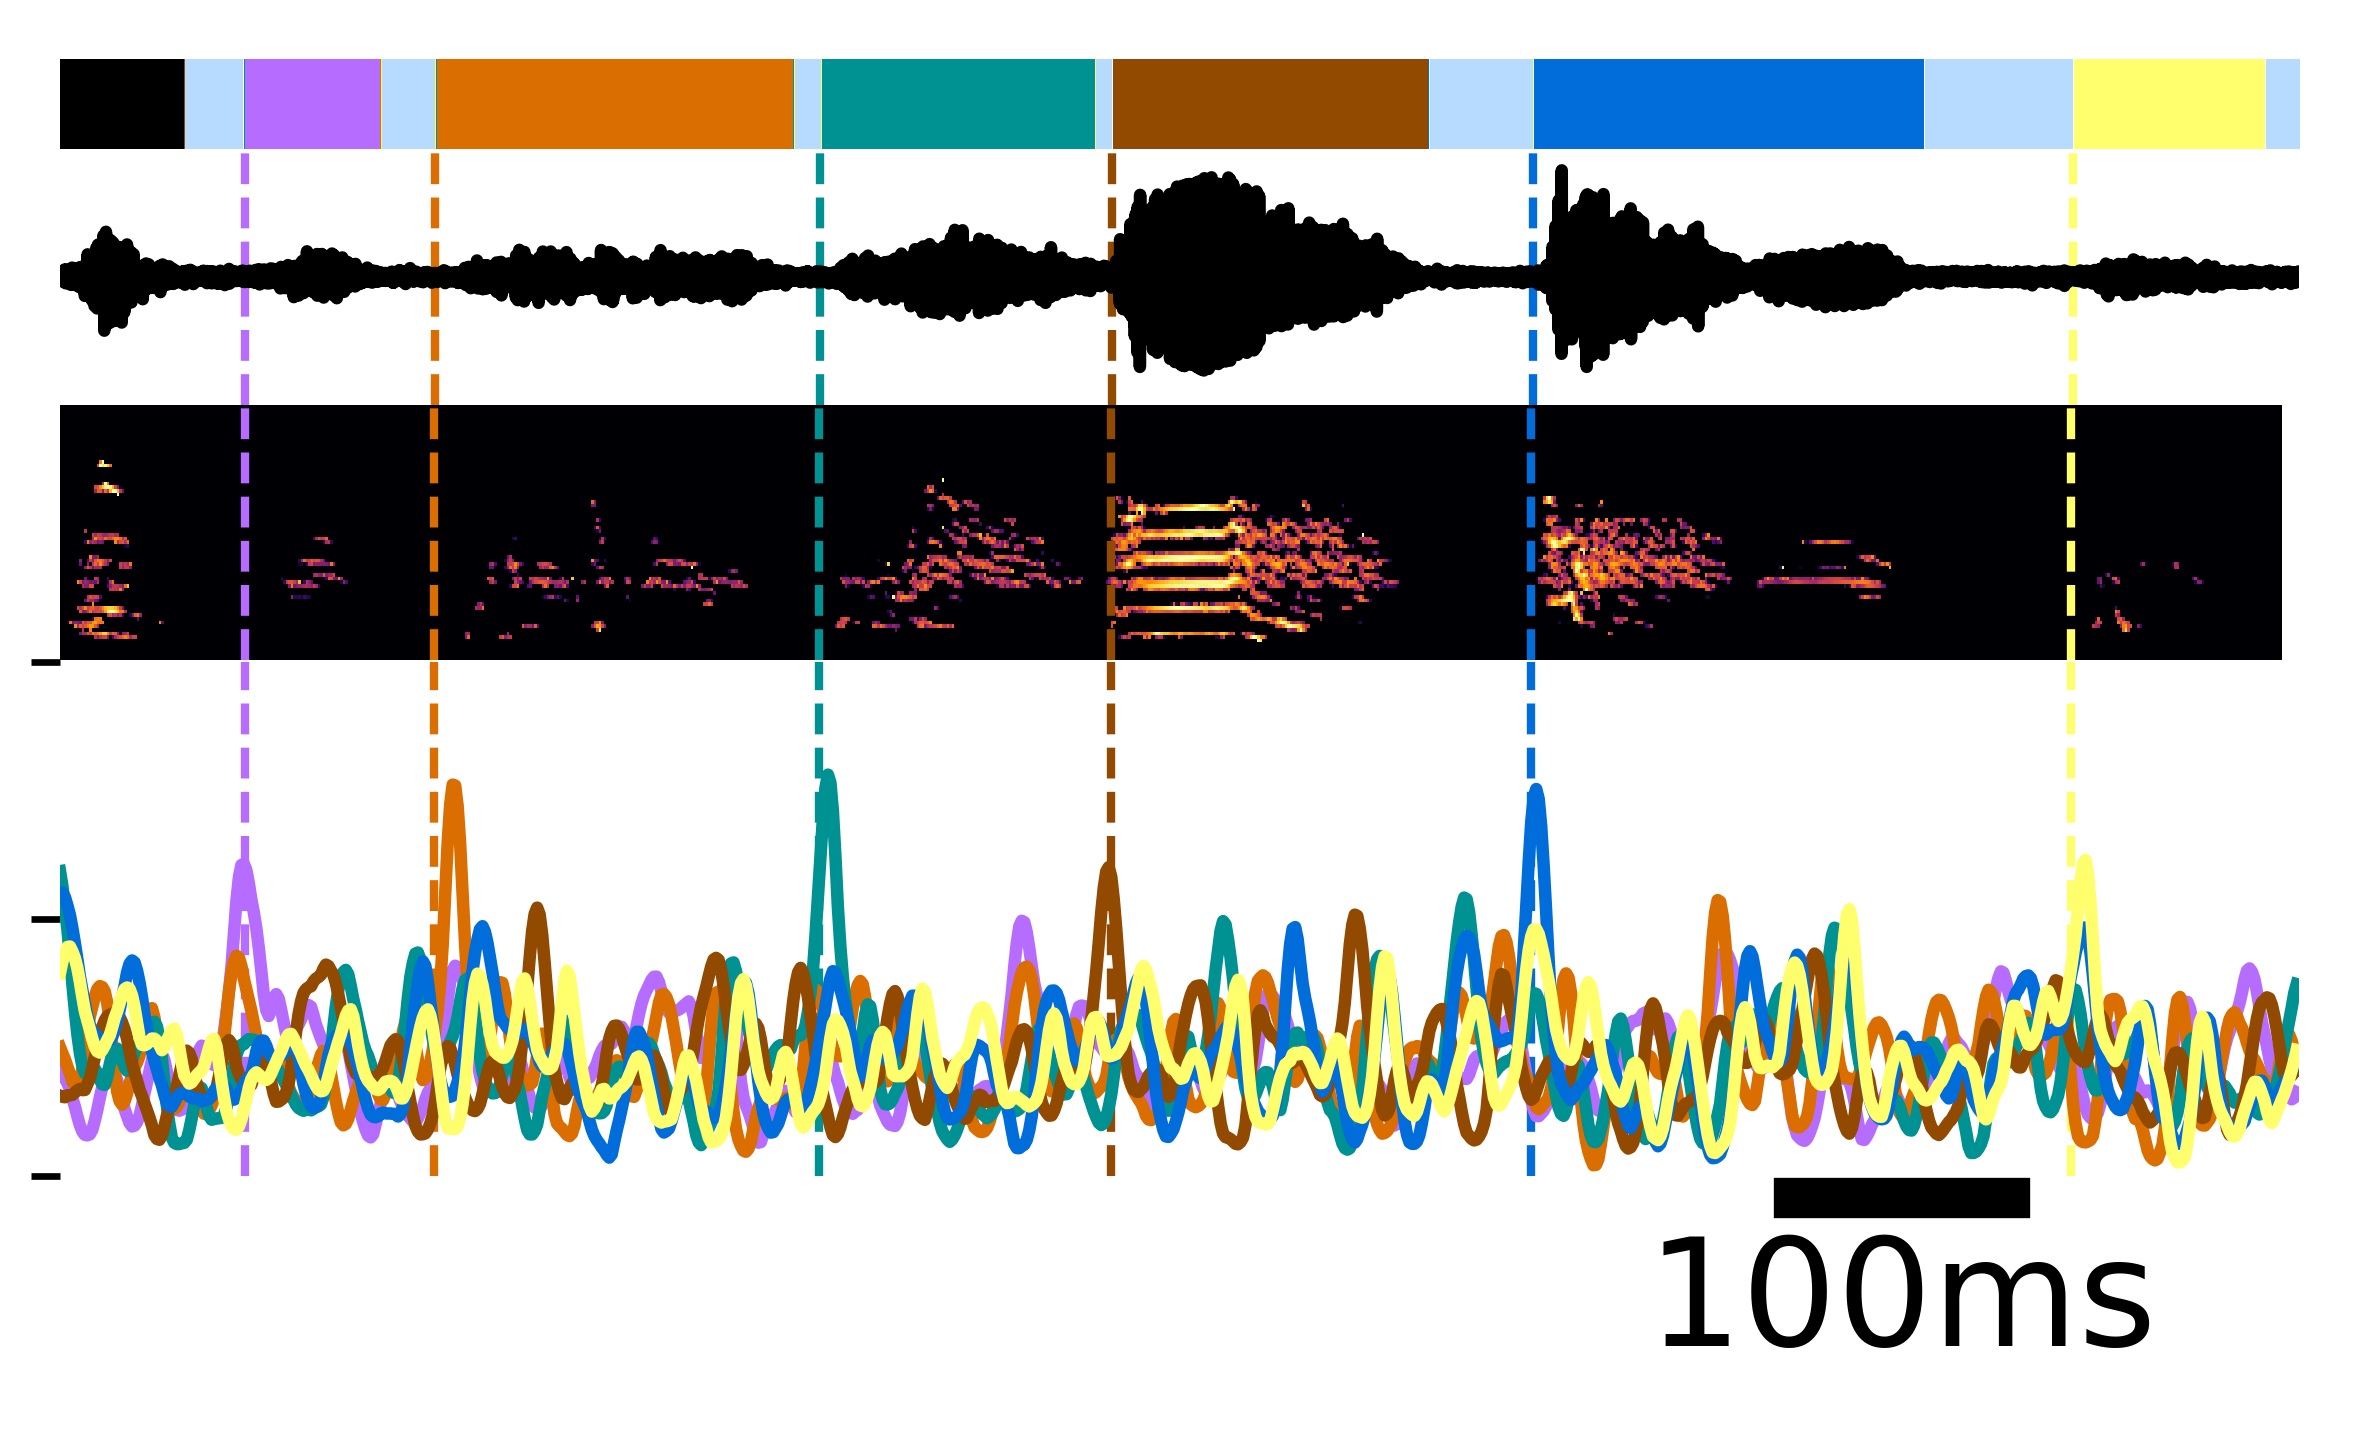

In [49]:
# Note: Make the Duration of the song and the asociated limits be automatically pulled from the birds metadata

fig = plt.figure(figsize=(4,3), dpi = 300)


# Make the Subplots
# Color Labels
ax1 = fig.add_axes([0.0333, 0.60641, 0.933, 0.05], frame_on=False, xticklabels=[],)
# Pressure Waveform
ax2 = fig.add_axes([0.0333, 0.46441, 0.933, 0.142], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))
# Spectrogram
ax3 = fig.add_axes([0.0333, 0.32241, 0.933, .142], frame_on=False, xticklabels=[],  ylim=(-1.2, 1.2))
ax4 = fig.add_axes([0.0333, 0.0357, 0.933, 0.28571], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))


# colors= {1:'black',2:'blue',3:'orange', 4:'green' ,5:'red', 6:'blue', 7:'white', 8:'white','I':'pink', 'C':'purple', 'BUFFER': 'white'}

colors= {1:'#000000',2:'#B66DFF',3:'#db6e00', 4:'#009292' ,5:'#924900', 6:'#006DDB', 7:'#FFFF6D', 9:'#B6DBFF',
         8:'white','I':'#feb4d9', 'C':'#490092', 'BUFFER': 'white'}

repeated_behave = repeat_motif_events(labels_array= sel_behave)
ax1.imshow(repeated_behave, cmap=cmap2, Norm=norm, aspect="auto")

# ax1.set_xlim(0,.9)


for start, label in zip(sel_rel_starts, [2,3,4,5, 6, 7]):
        color = colors[label]
#         print(start)
#         print(start/30000)
        ax2.axvline(x=start/30000, linestyle='--', color=color, linewidth=line_width*2)
        ax4.axvline(x=start/30, linestyle='--', color=color, linewidth=line_width*2)
        ax3.axvline(x=start/30, linestyle='--', color=color, linewidth=line_width*2)
        
ax1.get_yaxis().set_visible(False)  # Hide the Y axis
ax1.get_xaxis().set_visible(False)  # Hide the Y axis

# Audio Pressure Waveform
timeseries_audio = sel_audio/np.max(sel_audio)
timeseries_length = len(timeseries_audio)/30000  # Convert x to seconds
ax2.plot(np.arange(0, timeseries_length, 1/30000), timeseries_audio, color = "black")
ax2.get_yaxis().set_visible(False)  # Hide the Y axis
ax2.get_xaxis().set_visible(False)  # Hide the Y axis
    
ax2.set_xlim(0,.9)


# Plot the Spectrogram
sns.heatmap(s2, xticklabels=False, yticklabels= False, cbar = False, cmap= 'inferno', ax = ax3)
ax3.invert_yaxis()
ax3.set_ylim((0,70))
ax3.set_xlim((0,901))


for predict_slam, color in zip(exemplar_predictions, ['#B66DFF','#db6e00','#009292','#924900','#006DDB','#FFFF6D']):
    ax4.plot(np.arange(901), predict_slam/max_confidence, color = color)

ax4.set_ylim(0, 1)
ax4.set_xlim(0, 901)
# ax4.get_yaxis().set_visible(False)  # Hide the Y axis
ax4.set_yticklabels([])
ax4.get_xaxis().set_visible(False)  # Hide the Y axis

#

# Add a Scale Bar
scalebar = AnchoredSizeBar(ax2.transData,
                           .1, '100ms', 'center right', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=.3,
                           fontproperties=fontprops, bbox_to_anchor=(.95, -.2),
                           bbox_transform=ax4.transAxes)

ax4.add_artist(scalebar)

plt.show()

## Handle the Branch 1 Visualizaiton

In [50]:
# make a index for the motifs that have Branch 1
branch_1 = [x for x in motif_ledger[5] if x not in motif_ledger[6]]  # Index of Motifs w/o the Syll 7

# Get the Behavior for Branch 1

branch1_behave = all_motif_behave[branch_1,:]

# Get the Audio for Branch 1
branch1_audio = clipped_audio[branch_1,:]

In [51]:
branch_1

[9, 16, 18, 20, 25, 27, 34, 38, 42, 46, 50, 53, 60, 65, 71, 74, 89, 92]

In [52]:
branch1_sel = 4 



sel_rel_starts2 = z017_day1_bs1[branch1_sel]
exemplar_predictions2 = z017_day1_bo1[branch1_sel, :,:]
exemplar_branch_predictions2 = z017_day1_p1[branch1_sel, :,:]
sel_behave2 = branch1_behave[branch1_sel,:]



sel_audio2 = branch1_audio[branch1_sel,:]

f3, t3, s3 = my_spectrogram(sel_audio2, f_cut=.5, nfft=200)

In [53]:
mask = (s3>.1) & (s3<.2)
s3[mask] = s3[mask]*3

mask = (s3>.2) & (s3<.5)
s3[mask] = s3[mask]*1.5

mask = (s3>.01) & (s3<.1)
s3[mask] = s3[mask]*5

/home/debrown/anaconda3/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


(5, 901)
(5, 901)


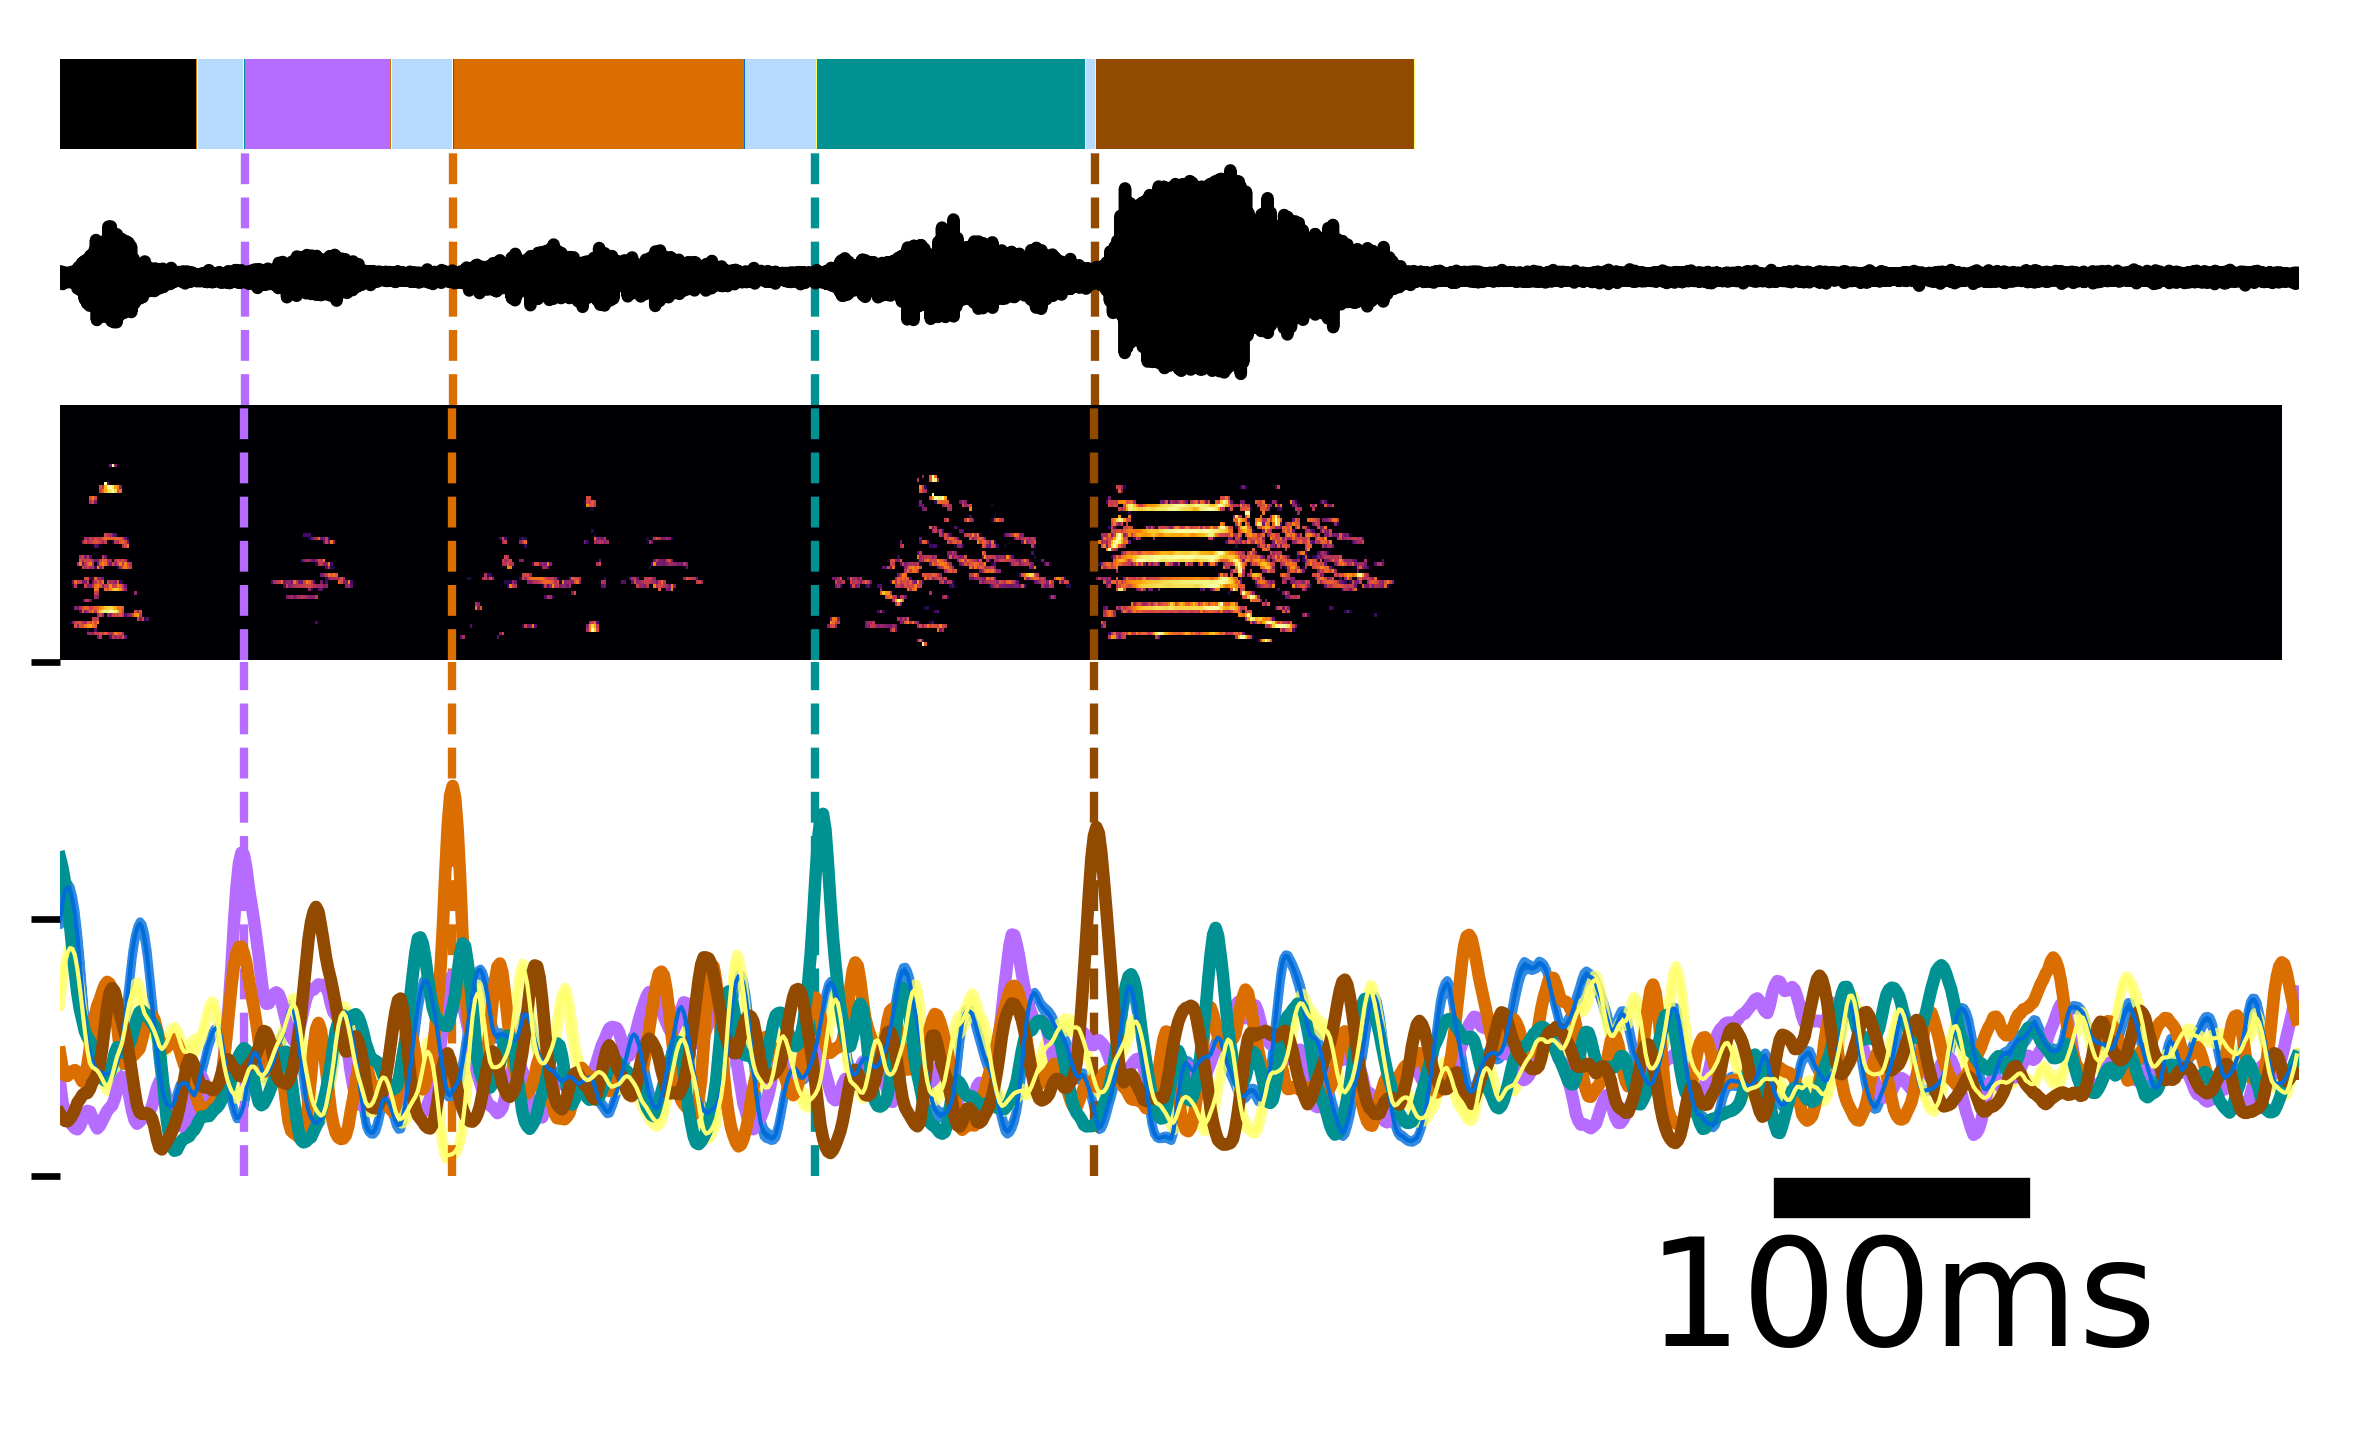

In [54]:
# Note: Make the Duration of the song and the asociated limits be automatically pulled from the birds metadata

fig = plt.figure(figsize=(4,3), dpi = 300)


# Make the Subplots
# Color Labels
ax1 = fig.add_axes([0.0333, 0.60641, 0.933, 0.05], frame_on=False, xticklabels=[],)
# Pressure Waveform
ax2 = fig.add_axes([0.0333, 0.46441, 0.933, 0.142], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))
# Spectrogram
ax3 = fig.add_axes([0.0333, 0.32241, 0.933, .142], frame_on=False, xticklabels=[],  ylim=(-1.2, 1.2))
ax4 = fig.add_axes([0.0333, 0.0357, 0.933, 0.28571], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))


# colors= {1:'black',2:'blue',3:'orange', 4:'green' ,5:'red', 6:'blue', 7:'white', 8:'white','I':'pink', 'C':'purple', 'BUFFER': 'white'}

colors= {1:'#000000',2:'#B66DFF',3:'#db6e00', 4:'#009292' ,5:'#924900', 6:'#006DDB', 7:'#FFFF6D', 9:'#B6DBFF',
         8:'white','I':'#feb4d9', 'C':'#490092', 'BUFFER': 'white'}

repeated_behave = repeat_motif_events(labels_array= sel_behave2)
ax1.imshow(repeated_behave, cmap=cmap2, Norm=norm, aspect="auto")

# ax1.set_xlim(0,.5)


for start, label in zip(sel_rel_starts2, [2,3,4,5, 6, 7]):
        color = colors[label]
#         print(start)
#         print(start/30000)
        ax2.axvline(x=start/30000, linestyle='--', color=color, linewidth=line_width*2)
        ax4.axvline(x=start/30, linestyle='--', color=color, linewidth=line_width*2)
        ax3.axvline(x=start/30, linestyle='--', color=color, linewidth=line_width*2)
        
ax1.get_yaxis().set_visible(False)  # Hide the Y axis
ax1.get_xaxis().set_visible(False)  # Hide the Y axis

# Audio Pressure Waveform
timeseries_audio = sel_audio2/np.max(sel_audio2)
timeseries_length = len(timeseries_audio)/30000  # Convert x to seconds
ax2.plot(np.arange(0, timeseries_length, 1/30000), timeseries_audio, color = "black")
ax2.get_yaxis().set_visible(False)  # Hide the Y axis
ax2.get_xaxis().set_visible(False)  # Hide the Y axis
    
ax2.set_xlim(0,.9)


# Plot the Spectrogram
sns.heatmap(s3, xticklabels=False, yticklabels= False, cbar = False, cmap= 'inferno', ax = ax3)
ax3.invert_yaxis()
ax3.set_ylim((0,70))
ax3.set_xlim((0,901))


for predict_slam, color in zip(exemplar_predictions2, ['#B66DFF','#db6e00','#009292','#924900','#006DDB','#FFFF6D']):
    ax4.plot(np.arange(901), predict_slam/max_confidence, color = color)
    
# include the branch syllables
for predict_slam, color in zip(exemplar_branch_predictions2, ['#006DDB','#FFFF6D']):
    mean_predict_slame = np.mean(predict_slam, axis=0)
#     ax4.plot(np.arange(901), mean_predict_slame/max_confidence, color = color)
    
    print(np.shape(predict_slam/max_confidence))
    plot_mean_w_std(trials=np.transpose(predict_slam/max_confidence), times=np.arange(901), times_labels=None, 
                    color = color, linewidth= line_width2,  ax=ax4)
    
    
ax4.set_ylim(0, 1)
ax4.set_xlim(0, 901)
# ax4.get_yaxis().set_visible(False)  # Hide the Y axis
ax4.set_yticklabels([])
ax4.get_xaxis().set_visible(False)  # Hide the Y axis

#

# Add a Scale Bar
scalebar = AnchoredSizeBar(ax2.transData,
                           .1, '100ms', 'center right', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=.3,
                           fontproperties=fontprops, bbox_to_anchor=(.95, -.2),
                           bbox_transform=ax4.transAxes)

ax4.add_artist(scalebar)

plt.show()

In [55]:
# make a index for the motifs that have Branch 2
branch_2 = np.asarray([x for x in motif_ledger[6] if x not in motif_ledger[7]])  # Index of Motifs w/o the Syll 7

# Get the Behavior for Branch 2

branch2_behave = all_motif_behave[branch_2,:]

# Get the Audio for Branch 2
branch2_audio = clipped_audio[branch_2,:]

In [56]:
branch2_sel = 11
# branch2_sel = 26


sel_rel_starts3 = z017_day1_bs2[branch2_sel]
exemplar_predictions3 = z017_day1_bo2[branch2_sel, :,:]
exemplar_branch_predictions3 = z017_day1_p2[branch2_sel, :,:]
sel_behave3 = branch2_behave[branch2_sel,:]



sel_audio3 = branch2_audio[branch2_sel,:]

f4, t4, s4 = my_spectrogram(sel_audio3, f_cut=.5, nfft=200)

In [57]:
mask = (s4>.1) & (s4<.2)
s4[mask] = s4[mask]*3

mask = (s4>.2) & (s4<.5)
s4[mask] = s4[mask]*1.5

mask = (s4>.01) & (s4<.1)
s4[mask] = s4[mask]*5

In [58]:
time_buff = 50
expected_time = int(np.mean(z017_absolute_relative_starts[5] / 30))
expected_before = expected_time - time_buff
print(expected_before)
expected_after = expected_time + time_buff
print(expected_after)


759
859


/home/debrown/anaconda3/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


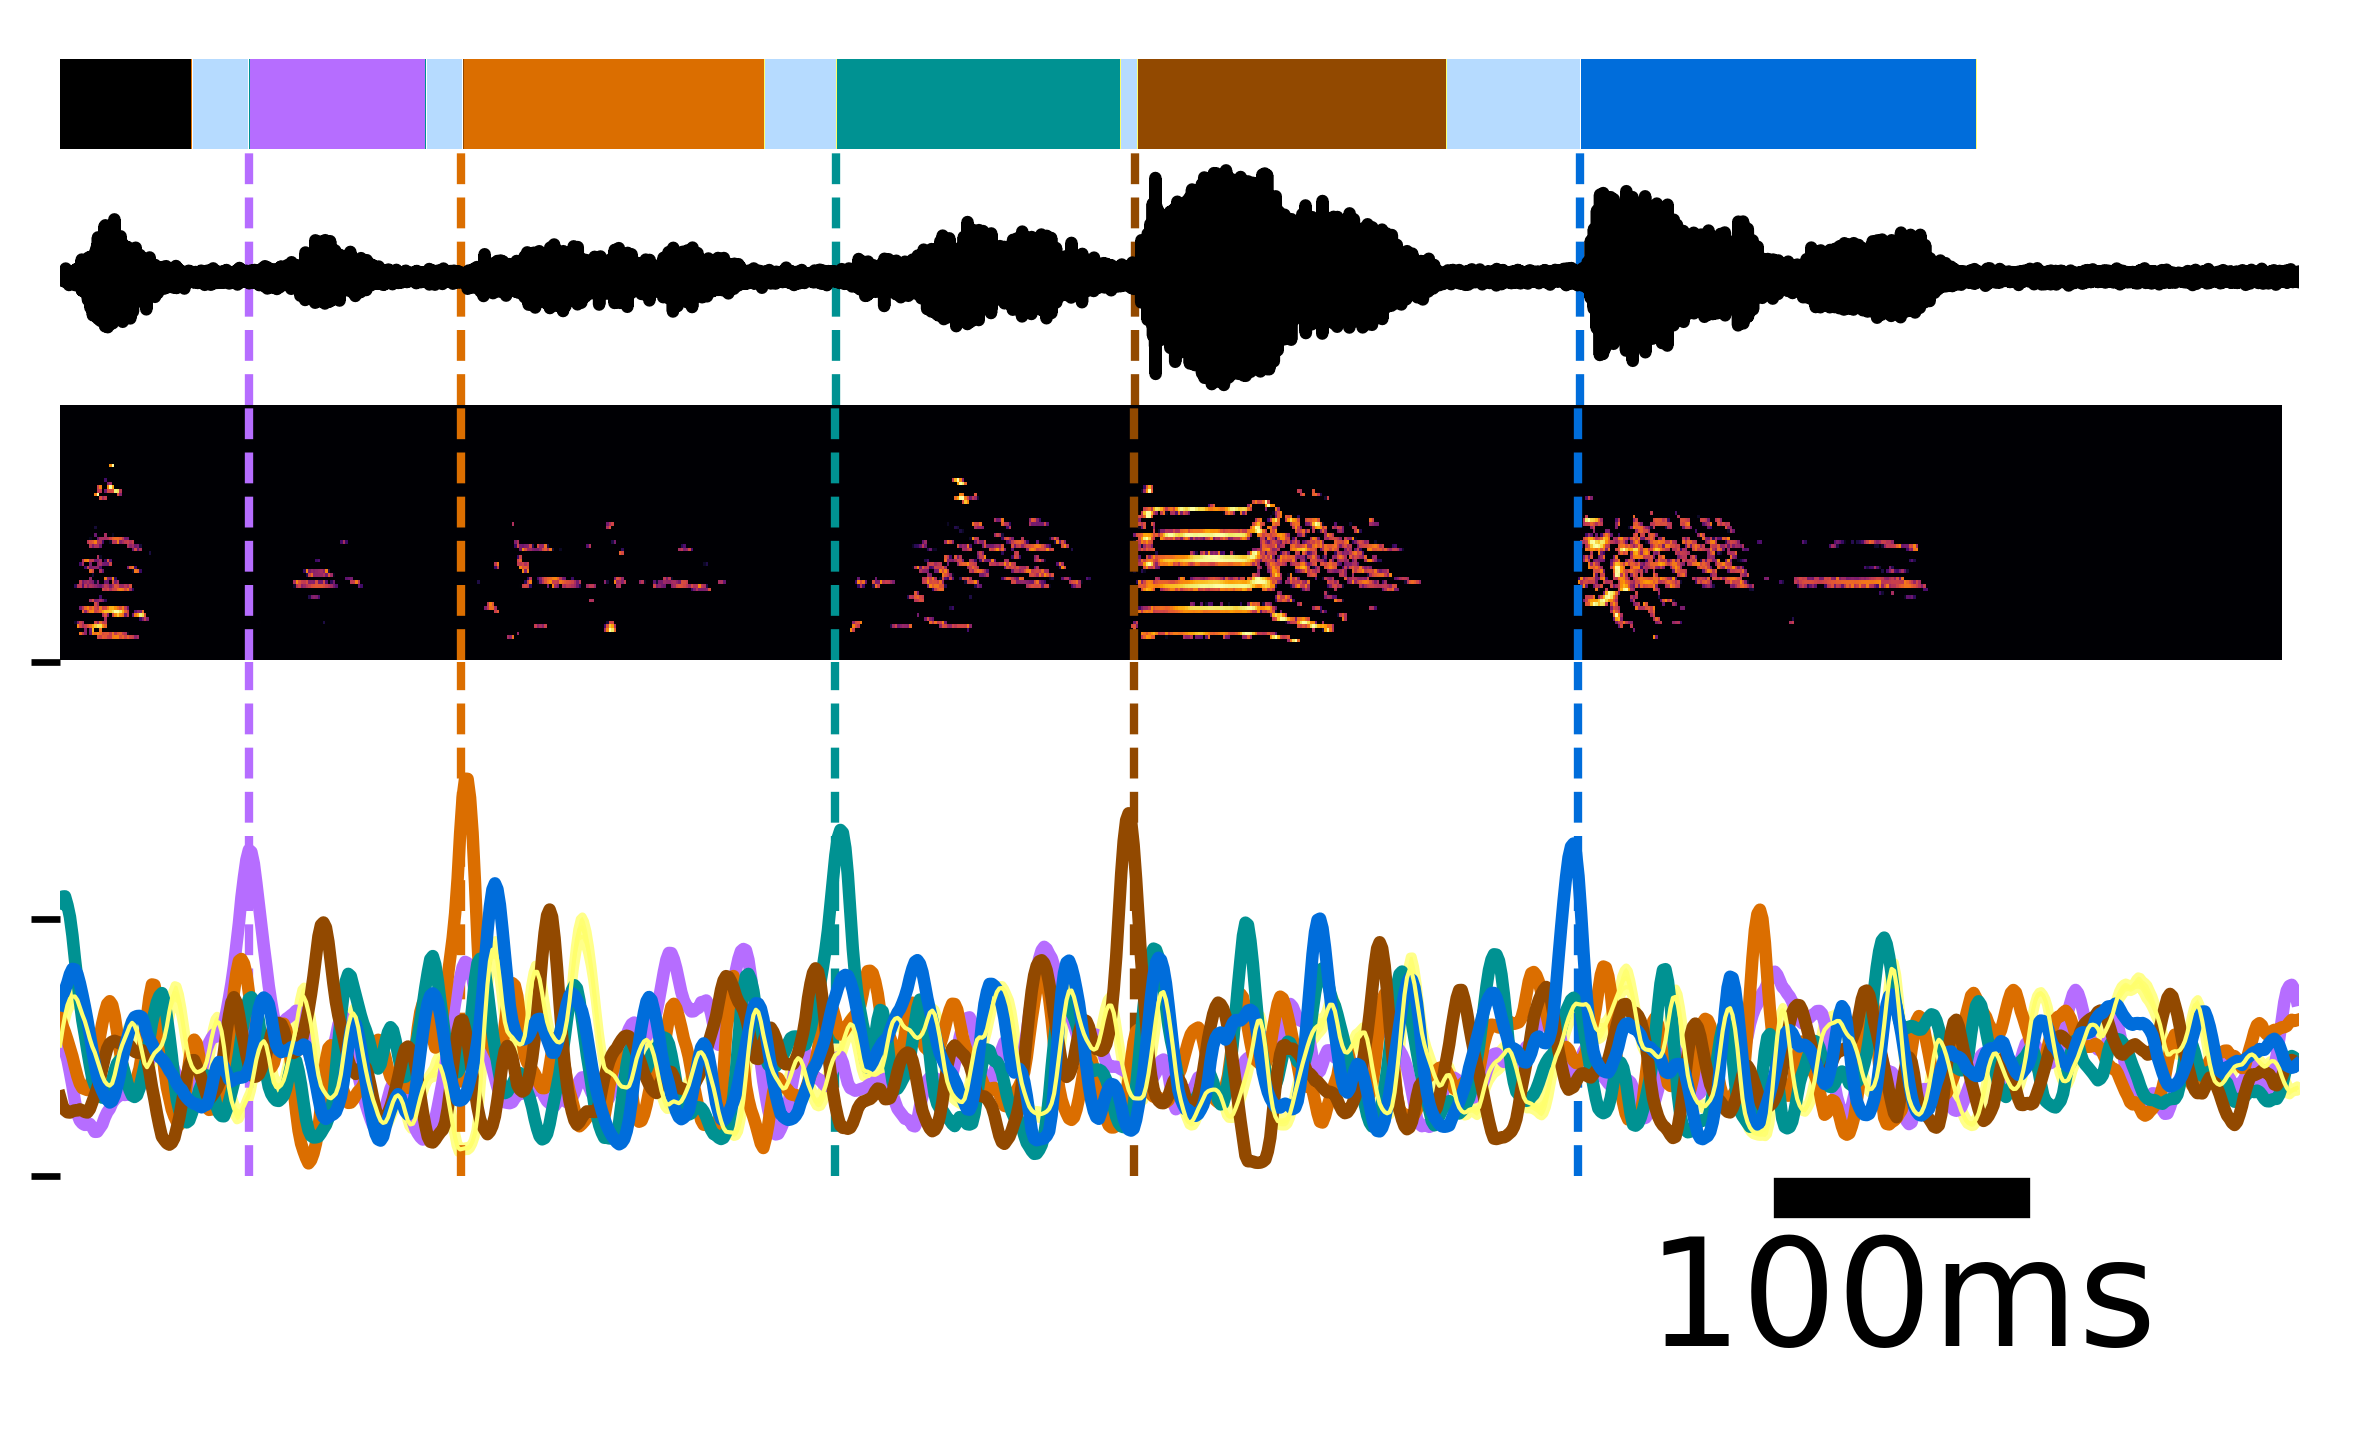

In [59]:
# Note: Make the Duration of the song and the asociated limits be automatically pulled from the birds metadata

fig = plt.figure(figsize=(4,3), dpi = 300)


# Make the Subplots
# Color Labels
ax1 = fig.add_axes([0.0333, 0.60641, 0.933, 0.05], frame_on=False, xticklabels=[],)
# Pressure Waveform
ax2 = fig.add_axes([0.0333, 0.46441, 0.933, 0.142], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))
# Spectrogram
ax3 = fig.add_axes([0.0333, 0.32241, 0.933, .142], frame_on=False, xticklabels=[],  ylim=(-1.2, 1.2))
ax4 = fig.add_axes([0.0333, 0.0357, 0.933, 0.28571], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))


# colors= {1:'black',2:'blue',3:'orange', 4:'green' ,5:'red', 6:'blue', 7:'white', 8:'white','I':'pink', 'C':'purple', 'BUFFER': 'white'}

colors= {1:'#000000',2:'#B66DFF',3:'#db6e00', 4:'#009292' ,5:'#924900', 6:'#006DDB', 7:'#FFFF6D', 9:'#B6DBFF',
         8:'white','I':'#feb4d9', 'C':'#490092', 'BUFFER': 'white'}

repeated_behave = repeat_motif_events(labels_array= sel_behave3)
ax1.imshow(repeated_behave, cmap=cmap2, Norm=norm, aspect="auto")

# ax1.set_xlim(0,.5)


for start, label in zip(sel_rel_starts3, [2,3,4,5, 6, 7]):
        color = colors[label]
#         print(start)
#         print(start/30000)
        ax2.axvline(x=start/30000, linestyle='--', color=color, linewidth=line_width*2)
        ax4.axvline(x=start/30, linestyle='--', color=color, linewidth=line_width*2)
        ax3.axvline(x=start/30, linestyle='--', color=color, linewidth=line_width*2)
        
ax1.get_yaxis().set_visible(False)  # Hide the Y axis
ax1.get_xaxis().set_visible(False)  # Hide the Y axis

# Audio Pressure Waveform
timeseries_audio = sel_audio3/np.max(sel_audio3)
timeseries_length = len(timeseries_audio)/30000  # Convert x to seconds
ax2.plot(np.arange(0, timeseries_length, 1/30000), timeseries_audio, color = "black")
ax2.get_yaxis().set_visible(False)  # Hide the Y axis
ax2.get_xaxis().set_visible(False)  # Hide the Y axis
    
ax2.set_xlim(0,.9)


# Plot the Spectrogram
sns.heatmap(s4, xticklabels=False, yticklabels= False, cbar = False, cmap= 'inferno', ax = ax3)
ax3.invert_yaxis()
ax3.set_ylim((0,70))
ax3.set_xlim((0,901))


for predict_slam, color in zip(exemplar_predictions3, ['#B66DFF','#db6e00','#009292','#924900','#006DDB','#FFFF6D']):
    ax4.plot(np.arange(901), predict_slam/max_confidence, color = color)
    
# include the branch syllables
for predict_slam, color in zip(exemplar_branch_predictions3, ['#FFFF6D']):
    mean_predict_slame = np.mean(predict_slam, axis=0)
#     ax4.plot(np.arange(901), mean_predict_slame/max_confidence, color = color)
    
#     print(np.shape(predict_slam/max_confidence))
    plot_mean_w_std(trials=np.transpose(predict_slam/max_confidence), times=np.arange(901), times_labels=None, 
                    color = color, linewidth= line_width2,  ax=ax4)
    
    
ax4.set_ylim(0, 1)
ax4.set_xlim(0, 901)
# ax4.get_yaxis().set_visible(False)  # Hide the Y axis
ax4.set_yticklabels([])
ax4.get_xaxis().set_visible(False)  # Hide the Y axis

#

# Add a Scale Bar
scalebar = AnchoredSizeBar(ax2.transData,
                           .1, '100ms', 'center right', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=.3,
                           fontproperties=fontprops, bbox_to_anchor=(.95, -.2),
                           bbox_transform=ax4.transAxes)

ax4.add_artist(scalebar)

plt.show()

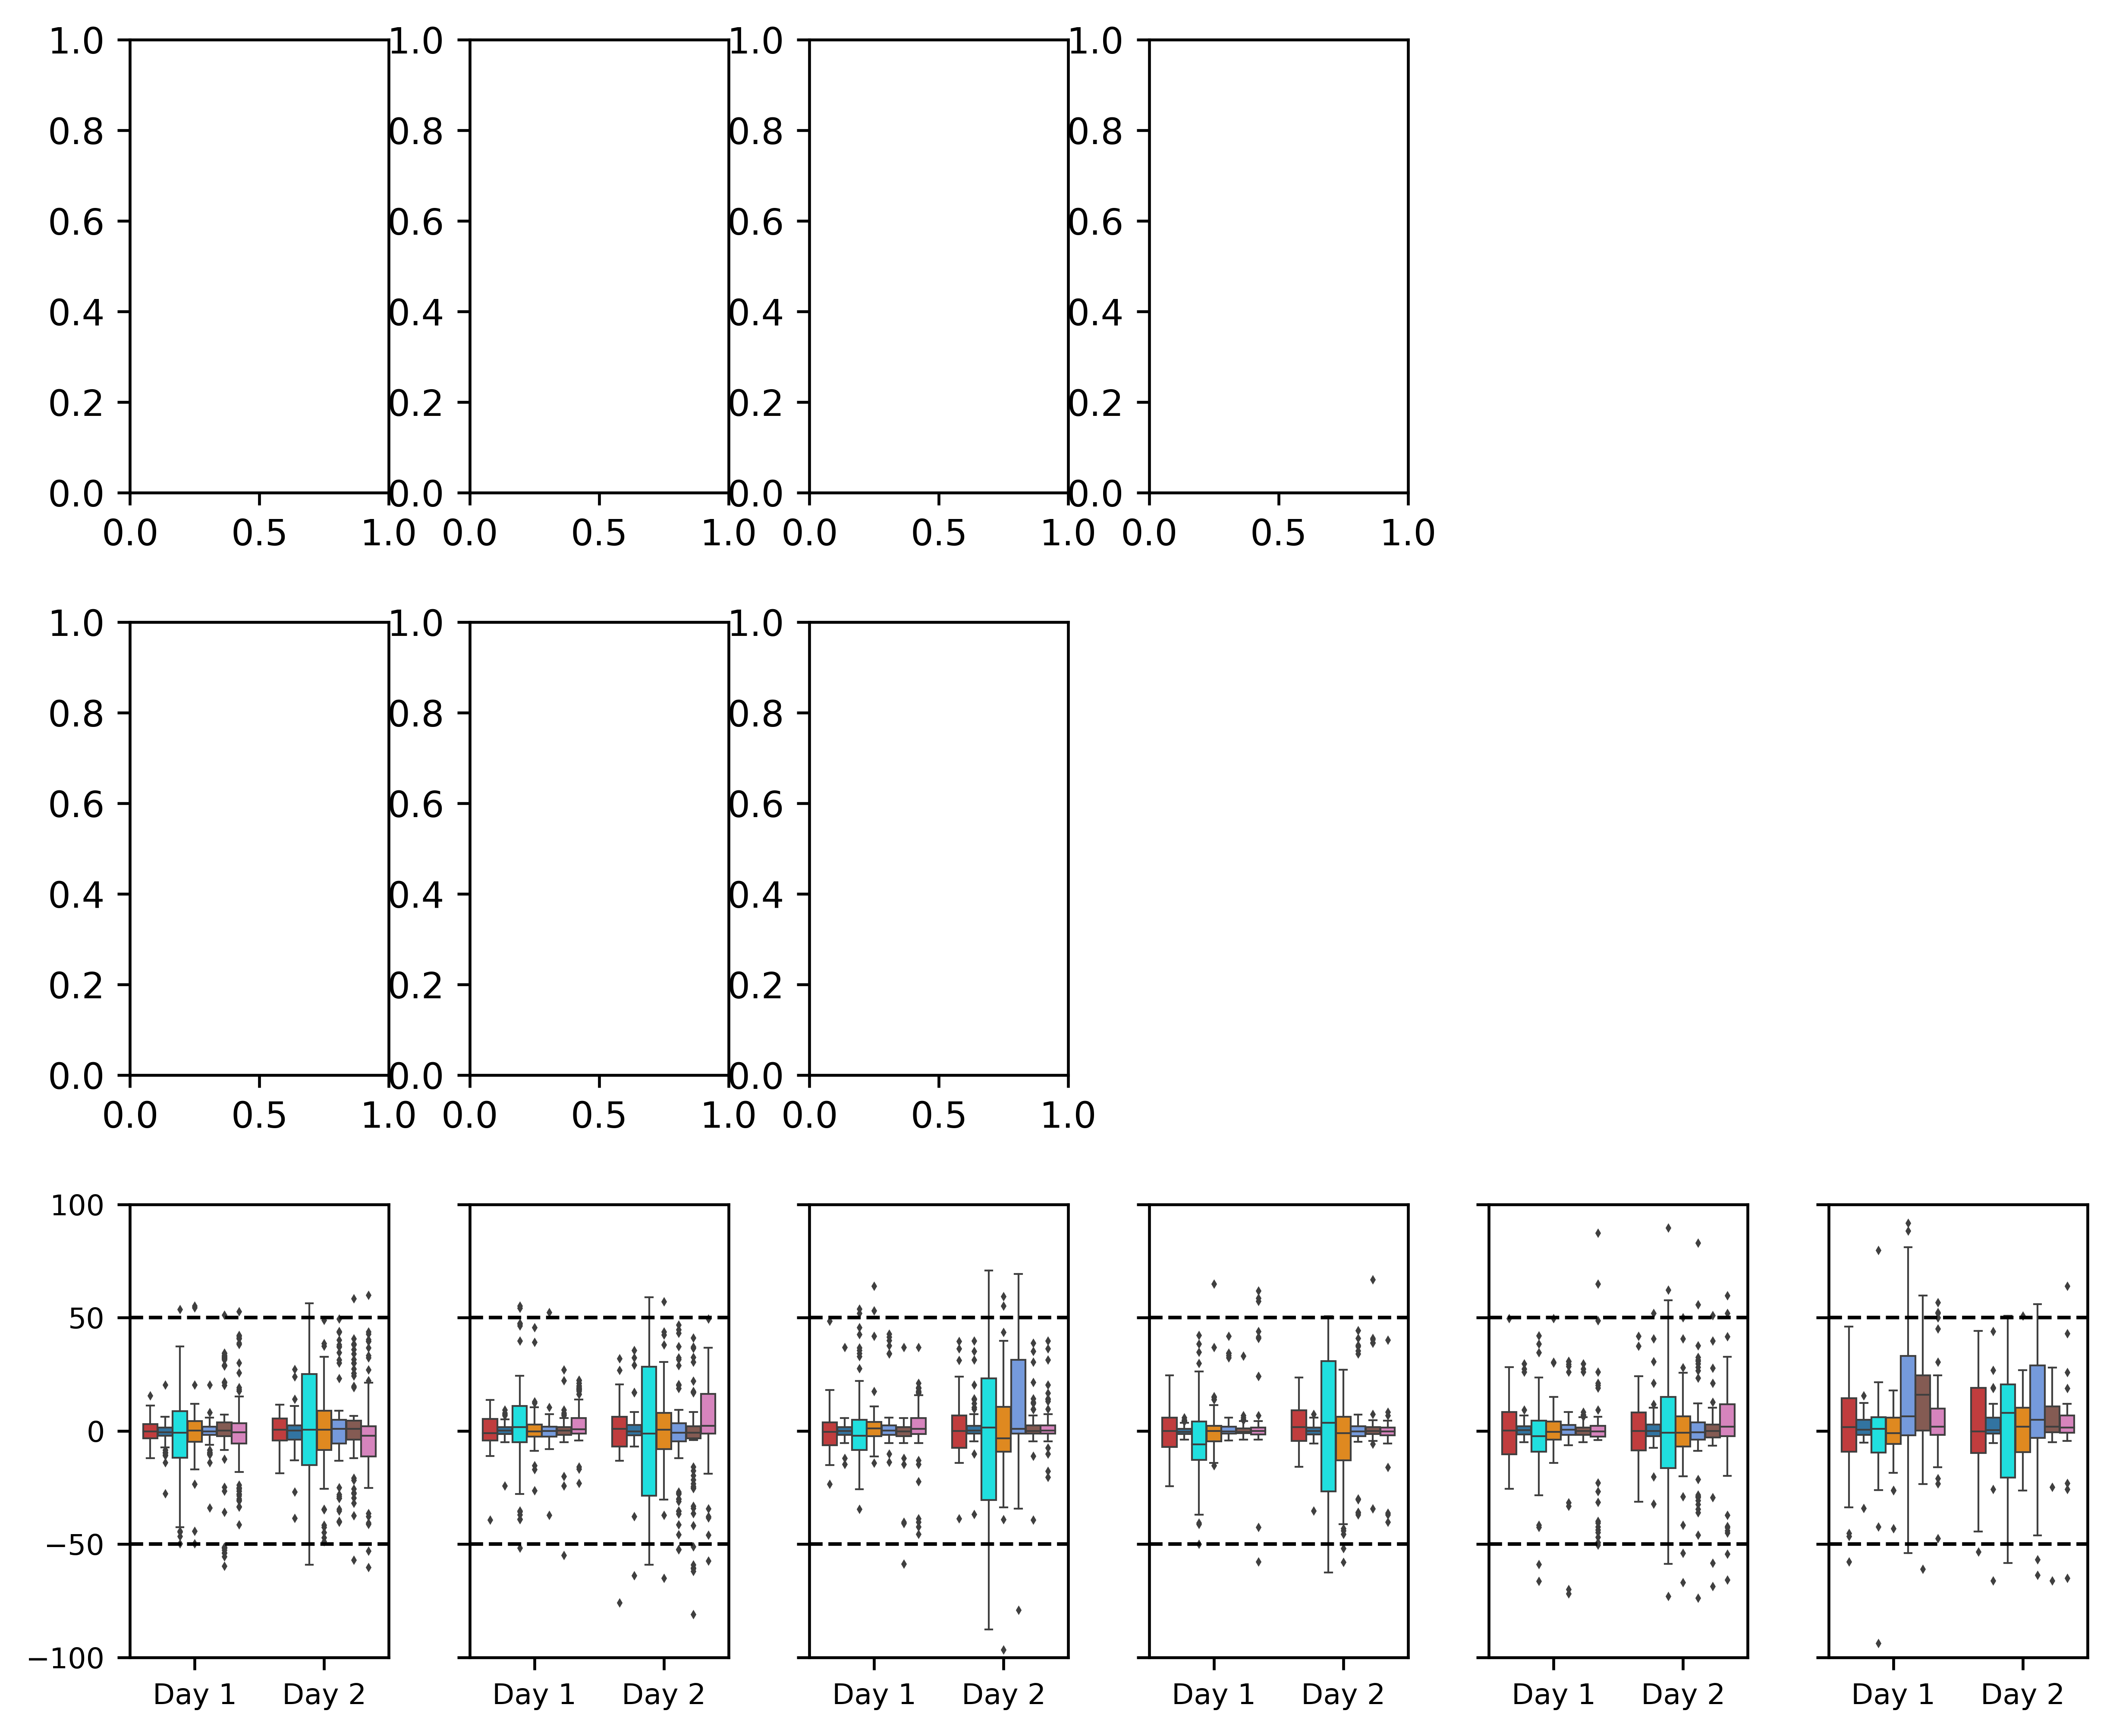

In [60]:
fig = plt.figure(figsize=(8.5, 7), dpi = 300)

freq_colors = [ 'tab:red', 'tab:blue', 'aqua', 'darkorange', 'cornflowerblue', 'tab:brown', 'tab:pink']

line_width = .5
subsize = 8
bigsize = 12
ticksize = 8

# z020_days = ['day-2016-06-03', 'day-2016-06-05']
# z007_days = ['day-2016-09-10','day-2016-09-11']
# z017_days = ['day-2016-06-19', 'day-2016-06-21']


# z017
syll_2_z017 = fig.add_axes([0.05882, 0.07142, 0.117647, 0.25]) 
syll_3_z017 = fig.add_axes([0.21323, 0.07142, 0.117647, 0.25]) # z017
syll_4_z017 = fig.add_axes([0.367634, 0.07142, 0.117647, 0.25]) # z017
syll_5_z017 = fig.add_axes([0.522041, 0.07142, 0.117647, 0.25]) 
syll_6_z017 = fig.add_axes([0.676448, 0.07142, 0.117647, 0.25]) 
syll_7_z017 = fig.add_axes([0.830854, 0.07142, 0.117647, 0.25]) 

# z020
syll_2_z020 = fig.add_axes([0.05882, 0.392839, 0.117647, 0.25]) 
syll_3_z020 = fig.add_axes([0.21323, 0.392839, 0.117647, 0.25]) # z017
syll_4_z020 = fig.add_axes([0.367634, 0.392839, 0.117647, 0.25]) # z017


# z007
syll_2_z007 = fig.add_axes([0.05882, 0.714259, 0.117647, 0.25]) 
syll_3_z007 = fig.add_axes([0.21323, 0.714259, 0.117647, 0.25]) # z017
syll_4_z007 = fig.add_axes([0.367634, 0.714259, 0.117647, 0.25]) # z017
syll_5_z007 = fig.add_axes([0.522041, 0.714259, 0.117647, 0.25]) 

########################

# z017
# Syllabel 2
## Box Plot
sns.boxplot(x="session", y="times", hue="Freq_band",
            hue_order=['Stereotyped', 'All', '4-8', '8-12', '25-35', '30-50', '50-70'],
            data=full_results_z017[full_results_z017["Syllable"]==2], 
            order=['Day 1','Day 2'],
            palette = freq_colors,
            fliersize=line_width, 
            linewidth=line_width, 
            ax=syll_2_z017)  # hue="Freq_band"

syll_2_z017.set_ylim(-100, 100)
syll_2_z017.axhline(y = 50, color= 'black', ls='--', linewidth=1)
syll_2_z017.axhline(y = -50, color= 'black', ls='--', linewidth=1)


syll_2_z017.set_ylabel('Time Relative to True Onset (ms)')
syll_2_z017.tick_params(axis='both', which='major', labelsize=ticksize)
# ax1.set_xticklabels([])
# syll_2_1.set_yticklabels([])
syll_2_z017.xaxis.label.set_visible(False)
syll_2_z017.yaxis.label.set_visible(False)

# overall_legend = syll_2_1.get_legend()
syll_2_z017.legend('',frameon=False)


# Syllabel 3
## Box Plot
sns.boxplot(x="session", y="times", hue="Freq_band",
            hue_order=['Stereotyped', 'All', '4-8', '8-12', '25-35', '30-50', '50-70'],
            data=full_results_z017[full_results_z017["Syllable"]==3], 
            order=['Day 1','Day 2'], 
            palette = freq_colors,
            fliersize=line_width, 
            linewidth=line_width, 
            ax=syll_3_z017)  # hue="Freq_band"

syll_3_z017.set_ylim(-100, 100)
syll_3_z017.axhline(y = 50, color= 'black', ls='--', linewidth=1)
syll_3_z017.axhline(y = -50, color= 'black', ls='--', linewidth=1)


syll_3_z017.set_ylabel('Time Relative to True Onset (ms)')
syll_3_z017.tick_params(axis='both', which='major', labelsize=ticksize)
# ax1.set_xticklabels([])
syll_3_z017.set_yticklabels([])
syll_3_z017.xaxis.label.set_visible(False)
syll_3_z017.yaxis.label.set_visible(False)

syll_3_z017.legend('',frameon=False)

# Syllabel 4
## Box Plot
sns.boxplot(x="session", y="times", hue="Freq_band",
            hue_order=['Stereotyped', 'All', '4-8', '8-12', '25-35', '30-50', '50-70'],
            data=full_results_z017[full_results_z017["Syllable"]==4], 
            order=['Day 1','Day 2'], 
            palette = freq_colors,
            fliersize=line_width, 
            linewidth=line_width, 
            ax=syll_4_z017)  # hue="Freq_band"

syll_4_z017.set_ylim(-100, 100)
syll_4_z017.axhline(y = 50, color= 'black', ls='--', linewidth=1)
syll_4_z017.axhline(y = -50, color= 'black', ls='--', linewidth=1)


syll_4_z017.set_ylabel('Time Relative to True Onset (ms)')
syll_4_z017.tick_params(axis='both', which='major', labelsize=ticksize)
# ax1.set_xticklabels([])
syll_4_z017.set_yticklabels([])
syll_4_z017.xaxis.label.set_visible(False)
syll_4_z017.yaxis.label.set_visible(False)

syll_4_z017.legend('',frameon=False)


# Syllabel 5
## Box Plot
sns.boxplot(x="session", y="times", hue="Freq_band",
            hue_order=['Stereotyped', 'All', '4-8', '8-12', '25-35', '30-50', '50-70'],
            data=full_results_z017[full_results_z017["Syllable"]==5], 
            order=['Day 1','Day 2'], 
            palette = freq_colors,
            fliersize=line_width, 
            linewidth=line_width, 
            ax=syll_5_z017)  # hue="Freq_band"

syll_5_z017.set_ylim(-100, 100)
syll_5_z017.axhline(y = 50, color= 'black', ls='--', linewidth=1)
syll_5_z017.axhline(y = -50, color= 'black', ls='--', linewidth=1)


syll_5_z017.set_ylabel('Time Relative to True Onset (ms)')
syll_5_z017.tick_params(axis='both', which='major', labelsize=ticksize)
# ax1.set_xticklabels([])
syll_5_z017.set_yticklabels([])
syll_5_z017.xaxis.label.set_visible(False)
syll_5_z017.yaxis.label.set_visible(False)

syll_5_z017.legend('',frameon=False)


# Syllabel 6
## Box Plot
sns.boxplot(x="session", y="times", hue="Freq_band",
            hue_order=['Stereotyped', 'All', '4-8', '8-12', '25-35', '30-50', '50-70'],
            data=full_results_z017[full_results_z017["Syllable"]==6], 
            order=['Day 1','Day 2'], 
            palette = freq_colors,
            fliersize=line_width, 
            linewidth=line_width, 
            ax=syll_6_z017)  # hue="Freq_band"

syll_6_z017.set_ylim(-100, 100)
syll_6_z017.axhline(y = 50, color= 'black', ls='--', linewidth=1)
syll_6_z017.axhline(y = -50, color= 'black', ls='--', linewidth=1)


syll_6_z017.set_ylabel('Time Relative to True Onset (ms)')
syll_6_z017.tick_params(axis='both', which='major', labelsize=ticksize)
# ax1.set_xticklabels([])
syll_6_z017.set_yticklabels([])
syll_6_z017.xaxis.label.set_visible(False)
syll_6_z017.yaxis.label.set_visible(False)

syll_6_z017.legend('',frameon=False)


# Syllabel 7
## Box Plot
sns.boxplot(x="session", y="times", hue="Freq_band",
            hue_order=['Stereotyped', 'All', '4-8', '8-12', '25-35', '30-50', '50-70'],
            data=full_results_z017[full_results_z017["Syllable"]==7], 
            order=['Day 1','Day 2'], 
            palette = freq_colors,
            fliersize=line_width, 
            linewidth=line_width, 
            ax=syll_7_z017)  # hue="Freq_band"

syll_7_z017.set_ylim(-100, 100)
syll_7_z017.axhline(y = 50, color= 'black', ls='--', linewidth=1)
syll_7_z017.axhline(y = -50, color= 'black', ls='--', linewidth=1)

syll_7_z017.set_ylabel('Time Relative to True Onset (ms)')
syll_7_z017.tick_params(axis='both', which='major', labelsize=ticksize)
# ax1.set_xticklabels([])
syll_7_z017.set_yticklabels([])
syll_7_z017.xaxis.label.set_visible(False)
syll_7_z017.yaxis.label.set_visible(False)

syll_7_z017.legend('',frameon=False)

plt.show()

/home/debrown/anaconda3/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


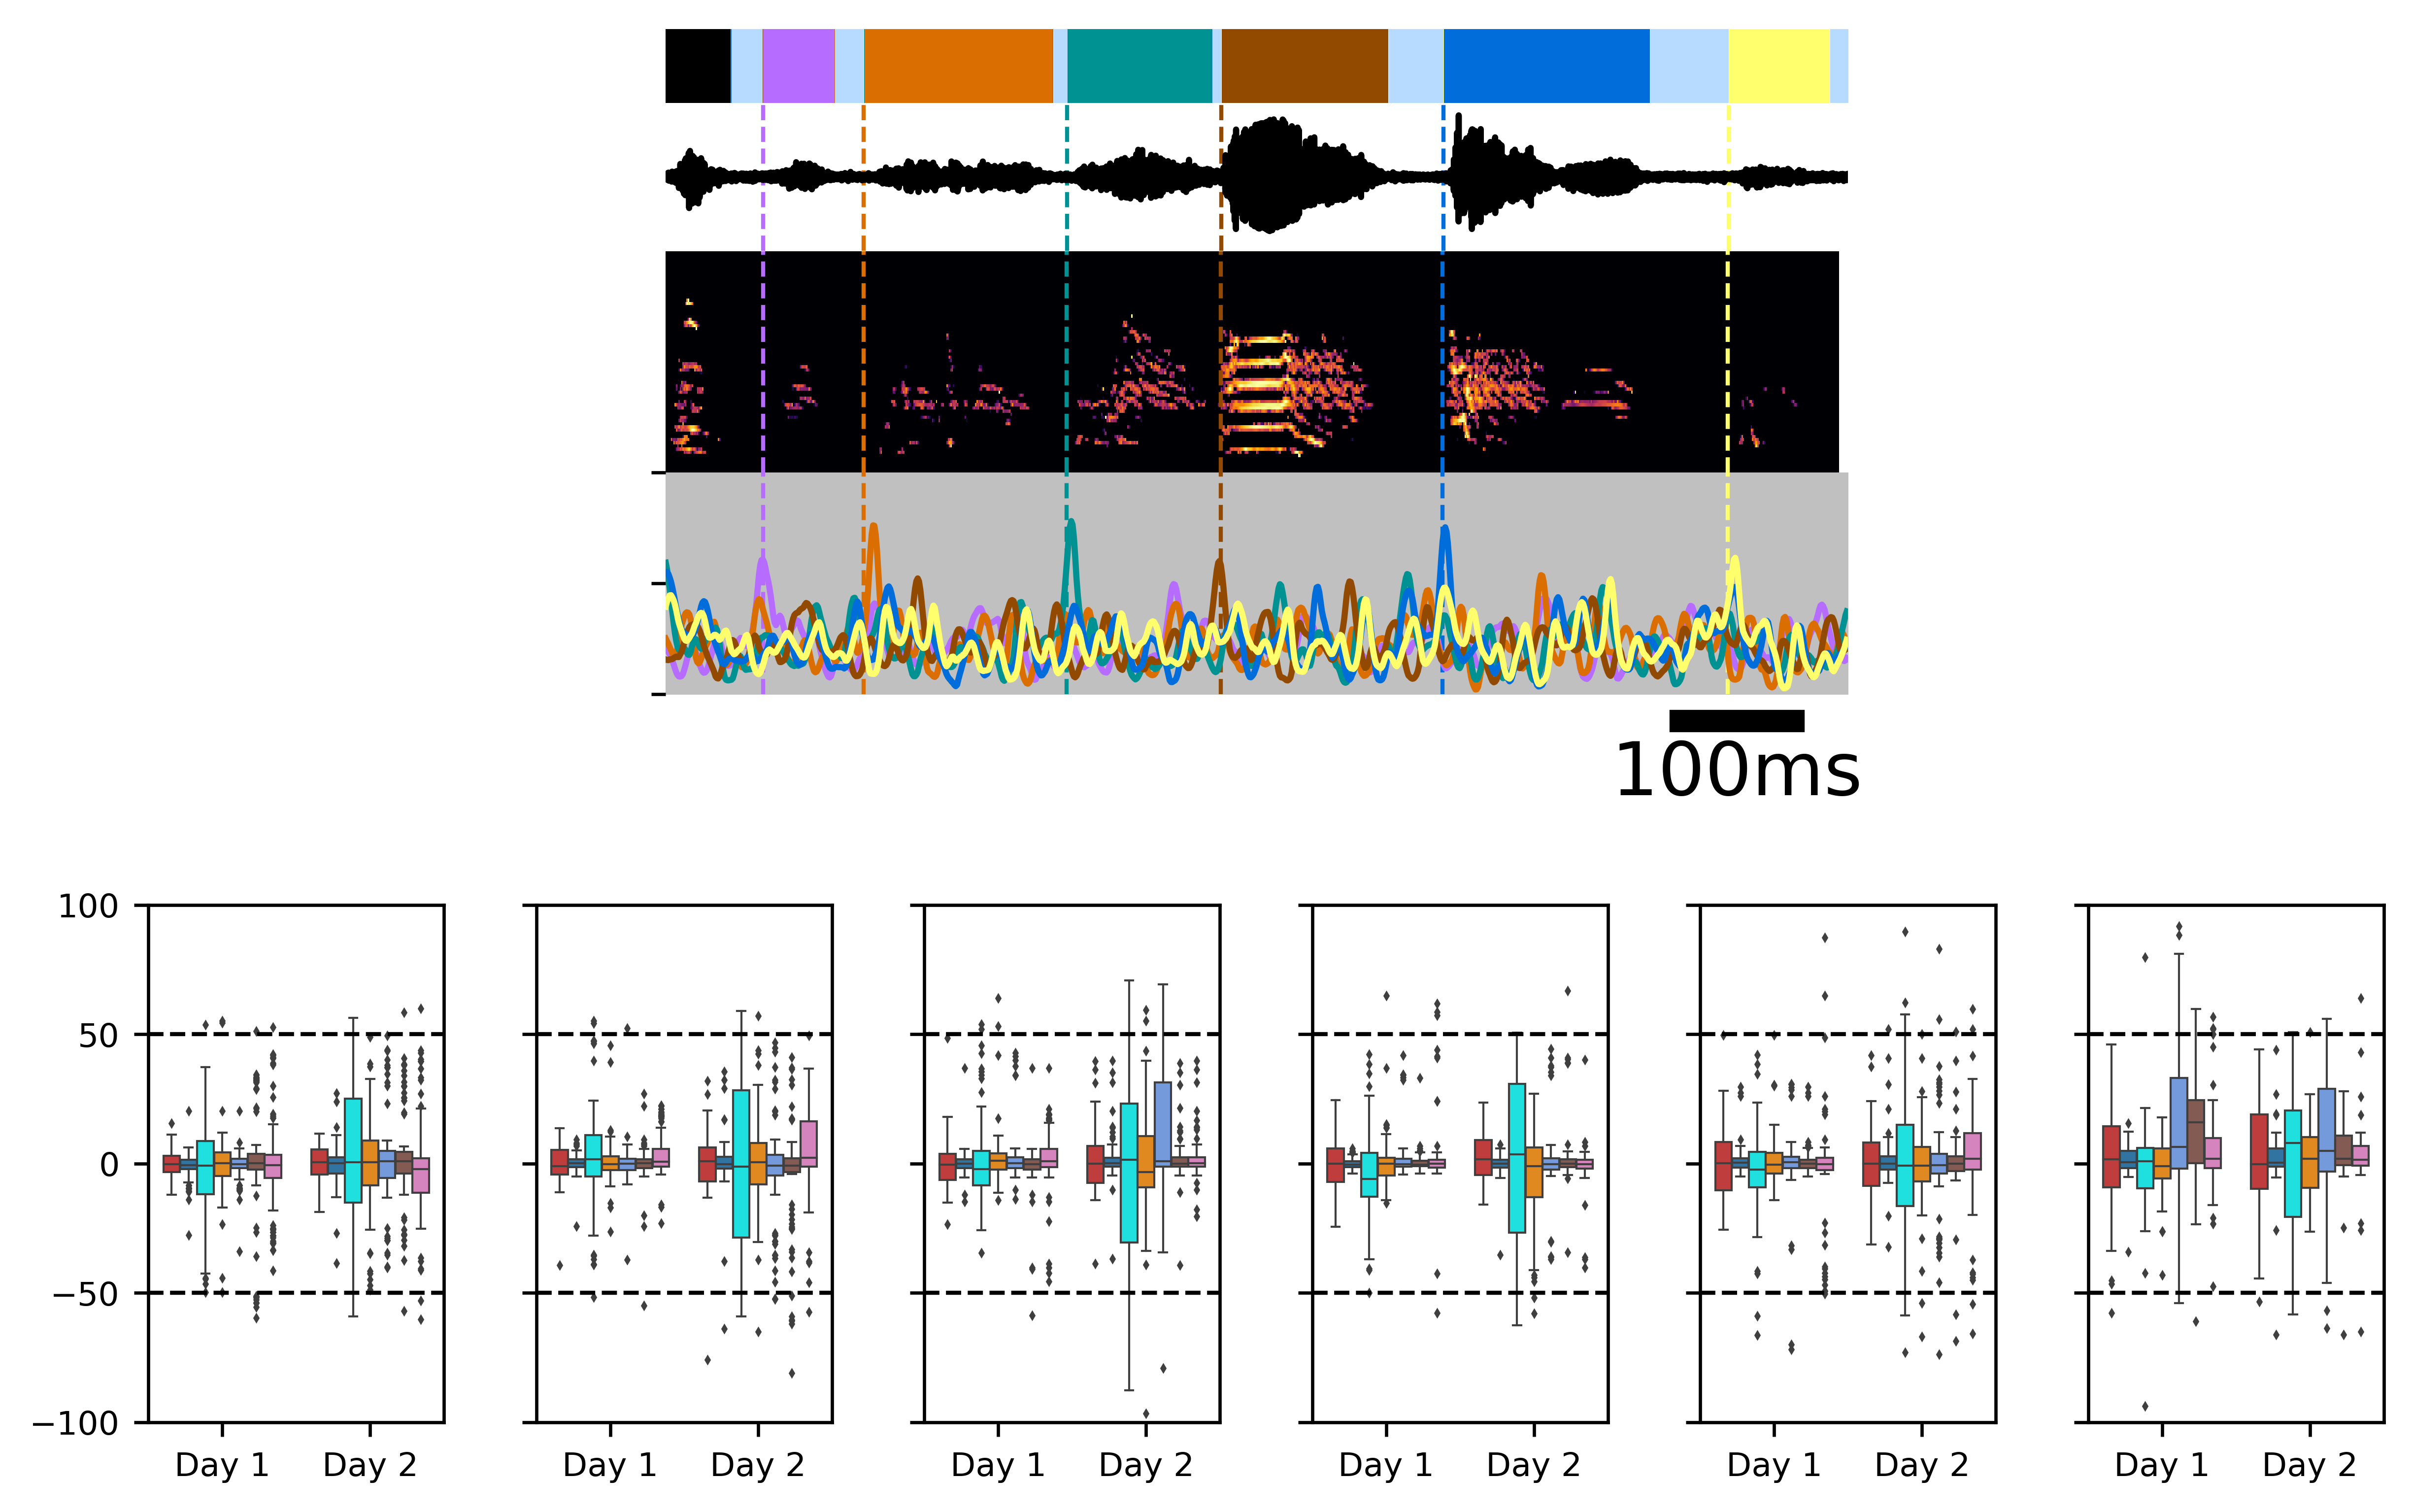

In [61]:
fig = plt.figure(figsize=(8.5, 7), dpi = 300)

freq_colors = [ 'tab:red', 'tab:blue', 'aqua', 'darkorange', 'cornflowerblue', 'tab:brown', 'tab:pink']


# Make the Subplots

# Exemplar Plot
predict_ax = fig.add_axes([0.2647058, 0.651787, 0.47058824, 0.10714], frame_on=False, xticklabels=[], ylim=(0, 1))
spect_ax = fig.add_axes([0.2647058, 0.7589298, 0.47058824, 0.10714], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))
pressure_ax = fig.add_axes([0.2647058, 0.86607, 0.47058824, 0.07142857], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))
label_ax = fig.add_axes([0.2647058, 0.93749857, 0.47058824, 0.03571429], frame_on=False, xticklabels=[]) #, ylim=(-1.2, 1.2))
# [left, bottom, width, height]

# z017
syll_2_1 = fig.add_axes([0.05882, 0.3, 0.117647, 0.25]) 
syll_3_1 = fig.add_axes([0.21323, 0.3, 0.117647, 0.25]) # z017
syll_4_1 = fig.add_axes([0.367634, 0.3, 0.117647, 0.25]) # z017
syll_5_1 = fig.add_axes([0.522041, 0.3, 0.117647, 0.25]) 
syll_6_1 = fig.add_axes([0.676448, 0.3, 0.117647, 0.25]) 
syll_7_1 = fig.add_axes([0.830854, 0.3, 0.117647, 0.25])



# # Exemplar Plot For Branch 1
# predict_ax2 = fig.add_axes([0.07352941, 0.651787, 0.41176471, 0.10714], frame_on=False, xticklabels=[], ylim=(0, 1))
# spect_ax2 = fig.add_axes([0.07352941, 0.7589298, 0.41176471, 0.10714], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))
# pressure_ax2 = fig.add_axes([0.07352941, 0.86607, 0.41176471, 0.07142857], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))
# label_ax2 = fig.add_axes([0.07352941, 0.93749857, 0.41176471, 0.03571429], frame_on=False, xticklabels=[]) #, ylim=(-1.2, 1.2))
# # [left, bottom, width, height]


# Make Plot of Behavior
repeated_behave = repeat_motif_events(labels_array= sel_behave, set_width= 400)
label_ax.imshow(repeated_behave, cmap=cmap2, Norm=norm, aspect="auto")

# ax1.set_xlim(0,.9)


for start, label in zip(sel_rel_starts, [2,3,4,5, 6, 7]):
        color = colors[label]
#         print(start)
#         print(start/30000)
        pressure_ax.axvline(x=start/30000, linestyle='--', color=color, linewidth=line_width*2)
        predict_ax.axvline(x=start/30, linestyle='--', color=color, linewidth=line_width*2)
        spect_ax.axvline(x=start/30, linestyle='--', color=color, linewidth=line_width*2)
        
label_ax.get_yaxis().set_visible(False)  # Hide the Y axis
label_ax.get_xaxis().set_visible(False)  # Hide the Y axis

# Audio Pressure Waveform
timeseries_audio = sel_audio/np.max(sel_audio)
timeseries_length = len(timeseries_audio)/30000  # Convert x to seconds
pressure_ax.plot(np.arange(0, timeseries_length, 1/30000), timeseries_audio, color = "black")
pressure_ax.get_yaxis().set_visible(False)  # Hide the Y axis
pressure_ax.get_xaxis().set_visible(False)  # Hide the Y axis
    
pressure_ax.set_xlim(0,.9)


# Plot the Spectrogram
sns.heatmap(s2, xticklabels=False, yticklabels= False, cbar = False, cmap= 'inferno', ax = spect_ax)
spect_ax.invert_yaxis()
spect_ax.set_ylim((0,70))
spect_ax.set_xlim(0, 901)


for predict_slam, color in zip(exemplar_predictions, ['#B66DFF','#db6e00','#009292','#924900','#006DDB','#FFFF6D']):
    predict_ax.plot(np.arange(901), predict_slam/max_confidence, color = color)

predict_ax.set_ylim(0, 1)
predict_ax.set_xlim(0, 901)
# predict_ax.get_yaxis().set_visible(False)  # Hide the Y axis
predict_ax.set_yticklabels([])
predict_ax.get_xaxis().set_visible(False)  # Hide the Y axis

# Add a Scale Bar
scalebar = AnchoredSizeBar(pressure_ax.transData,
                           .1, '100ms', 'center right', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=.3,
                           fontproperties=fontprops, bbox_to_anchor=(1.025, -.3),
                           bbox_transform=predict_ax.transAxes)


predict_ax.add_artist(scalebar)


# Syllabel 2
## Box Plot

sns.boxplot(x="session", y="times", hue="Freq_band",
            hue_order=['Stereotyped', 'All', '4-8', '8-12', '25-35', '30-50', '50-70'],
            data=full_results_z017[full_results_z017["Syllable"]==2], 
            order=['Day 1','Day 2'],
            palette = freq_colors,
            fliersize=line_width, 
            linewidth=line_width, 
            ax=syll_2_1)  # hue="Freq_band"

syll_2_1.set_ylim(-100, 100)
syll_2_1.axhline(y = 50, color= 'black', ls='--', linewidth=1)
syll_2_1.axhline(y = -50, color= 'black', ls='--', linewidth=1)


syll_2_1.set_ylabel('Time Relative to True Onset (ms)')
syll_2_1.tick_params(axis='both', which='major', labelsize=ticksize)
# ax1.set_xticklabels([])
# syll_2_1.set_yticklabels([])
syll_2_1.xaxis.label.set_visible(False)
syll_2_1.yaxis.label.set_visible(False)
syll_2_1.legend('',frameon=False)



# Syllabel 3
## Box Plot

sns.boxplot(x="session", y="times", hue="Freq_band",
            hue_order=['Stereotyped', 'All', '4-8', '8-12', '25-35', '30-50', '50-70'],
            data=full_results_z017[full_results_z017["Syllable"]==3], 
            order=['Day 1','Day 2'], 
            palette = freq_colors,
            fliersize=line_width, 
            linewidth=line_width, 
            ax=syll_3_1)  # hue="Freq_band"

syll_3_1.set_ylim(-100, 100)
syll_3_1.axhline(y = 50, color= 'black', ls='--', linewidth=1)
syll_3_1.axhline(y = -50, color= 'black', ls='--', linewidth=1)


syll_3_1.set_ylabel('Time Relative to True Onset (ms)')
syll_3_1.tick_params(axis='both', which='major', labelsize=ticksize)
# ax1.set_xticklabels([])
syll_3_1.set_yticklabels([])
syll_3_1.xaxis.label.set_visible(False)
syll_3_1.yaxis.label.set_visible(False)

syll_3_1.legend('',frameon=False)




# Syllabel 4
## Box Plot

sns.boxplot(x="session", y="times", hue="Freq_band",
            hue_order=['Stereotyped', 'All', '4-8', '8-12', '25-35', '30-50', '50-70'],
            data=full_results_z017[full_results_z017["Syllable"]==4], 
            order=['Day 1','Day 2'], 
            palette = freq_colors,
            fliersize=line_width, 
            linewidth=line_width, 
            ax=syll_4_1)  # hue="Freq_band"


syll_4_1.set_ylim(-100, 100)
syll_4_1.axhline(y = 50, color= 'black', ls='--', linewidth=1)
syll_4_1.axhline(y = -50, color= 'black', ls='--', linewidth=1)


syll_4_1.set_ylabel('Time Relative to True Onset (ms)')
syll_4_1.tick_params(axis='both', which='major', labelsize=ticksize)
# ax1.set_xticklabels([])
syll_4_1.set_yticklabels([])
syll_4_1.xaxis.label.set_visible(False)
syll_4_1.yaxis.label.set_visible(False)

syll_4_1.legend('',frameon=False)

# Syllabel 4
## Box Plot

sns.boxplot(x="session", y="times", hue="Freq_band",
            hue_order=['Stereotyped', 'All', '4-8', '8-12', '25-35', '30-50', '50-70'],
            data=full_results_z017[full_results_z017["Syllable"]==5], 
            order=['Day 1','Day 2'], 
            palette = freq_colors,
            fliersize=line_width, 
            linewidth=line_width, 
            ax=syll_5_1)  # hue="Freq_band"


syll_5_1.set_ylim(-100, 100)
syll_5_1.axhline(y = 50, color= 'black', ls='--', linewidth=1)
syll_5_1.axhline(y = -50, color= 'black', ls='--', linewidth=1)


syll_5_1.set_ylabel('Time Relative to True Onset (ms)')
syll_5_1.tick_params(axis='both', which='major', labelsize=ticksize)
# ax1.set_xticklabels([])
syll_5_1.set_yticklabels([])
syll_5_1.xaxis.label.set_visible(False)
syll_5_1.yaxis.label.set_visible(False)

syll_5_1.legend('',frameon=False)

# Syllabel 6
## Box Plot

sns.boxplot(x="session", y="times", hue="Freq_band",
            hue_order=['Stereotyped', 'All', '4-8', '8-12', '25-35', '30-50', '50-70'],
            data=full_results_z017[full_results_z017["Syllable"]==6], 
            order=['Day 1','Day 2'], 
            palette = freq_colors,
            fliersize=line_width, 
            linewidth=line_width, 
            ax=syll_6_1)  # hue="Freq_band"


syll_6_1.set_ylim(-100, 100)
syll_6_1.axhline(y = 50, color= 'black', ls='--', linewidth=1)
syll_6_1.axhline(y = -50, color= 'black', ls='--', linewidth=1)


syll_6_1.set_ylabel('Time Relative to True Onset (ms)')
syll_6_1.tick_params(axis='both', which='major', labelsize=ticksize)
# ax1.set_xticklabels([])
syll_6_1.set_yticklabels([])
syll_6_1.xaxis.label.set_visible(False)
syll_6_1.yaxis.label.set_visible(False)

syll_6_1.legend('',frameon=False)


# Syllabel 7
## Box Plot

sns.boxplot(x="session", y="times", hue="Freq_band",
            hue_order=['Stereotyped', 'All', '4-8', '8-12', '25-35', '30-50', '50-70'],
            data=full_results_z017[full_results_z017["Syllable"]==7], 
            order=['Day 1','Day 2'], 
            palette = freq_colors,
            fliersize=line_width, 
            linewidth=line_width, 
            ax=syll_7_1)  # hue="Freq_band"


syll_7_1.set_ylim(-100, 100)
syll_7_1.axhline(y = 50, color= 'black', ls='--', linewidth=1)
syll_7_1.axhline(y = -50, color= 'black', ls='--', linewidth=1)


syll_7_1.set_ylabel('Time Relative to True Onset (ms)')
syll_7_1.tick_params(axis='both', which='major', labelsize=ticksize)
# ax1.set_xticklabels([])
syll_7_1.set_yticklabels([])
syll_7_1.xaxis.label.set_visible(False)
syll_7_1.yaxis.label.set_visible(False)

syll_7_1.legend('',frameon=False)


# Fill in Background of Select Plots (For Contrast)
pressure_min, pressure_max = pressure_ax.get_ylim()
pressure_left, pressure_right = pressure_ax.get_xlim()
pressure_ax.fill_between(x = np.arange(pressure_left, pressure_right, .001), y1=pressure_min, y2=pressure_max, color = 'white')


predict_ax.fill_between(x = np.arange(0,901), y1=0, y2=1, color = 'silver')

# # Save the Figure
# figure_name = 'Onset_prediction' + 'z017_cb.svg'
# figure_type_folder = FIGURES_DIR / 'Branch_Analysis'

# # Check if Folder Path Exists
# if not figure_type_folder.exists():
#     figure_type_folder.mkdir(parents=True, exist_ok=True)

# figure_location = figure_type_folder / figure_name

# # fig.savefig(figure_location, format='png')
# fig.savefig(figure_location, dpi=300, papertype=None, format='svg')

plt.show()


/home/debrown/anaconda3/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/home/debrown/anaconda3/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:136: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/home/debrown/anaconda3/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:248: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later


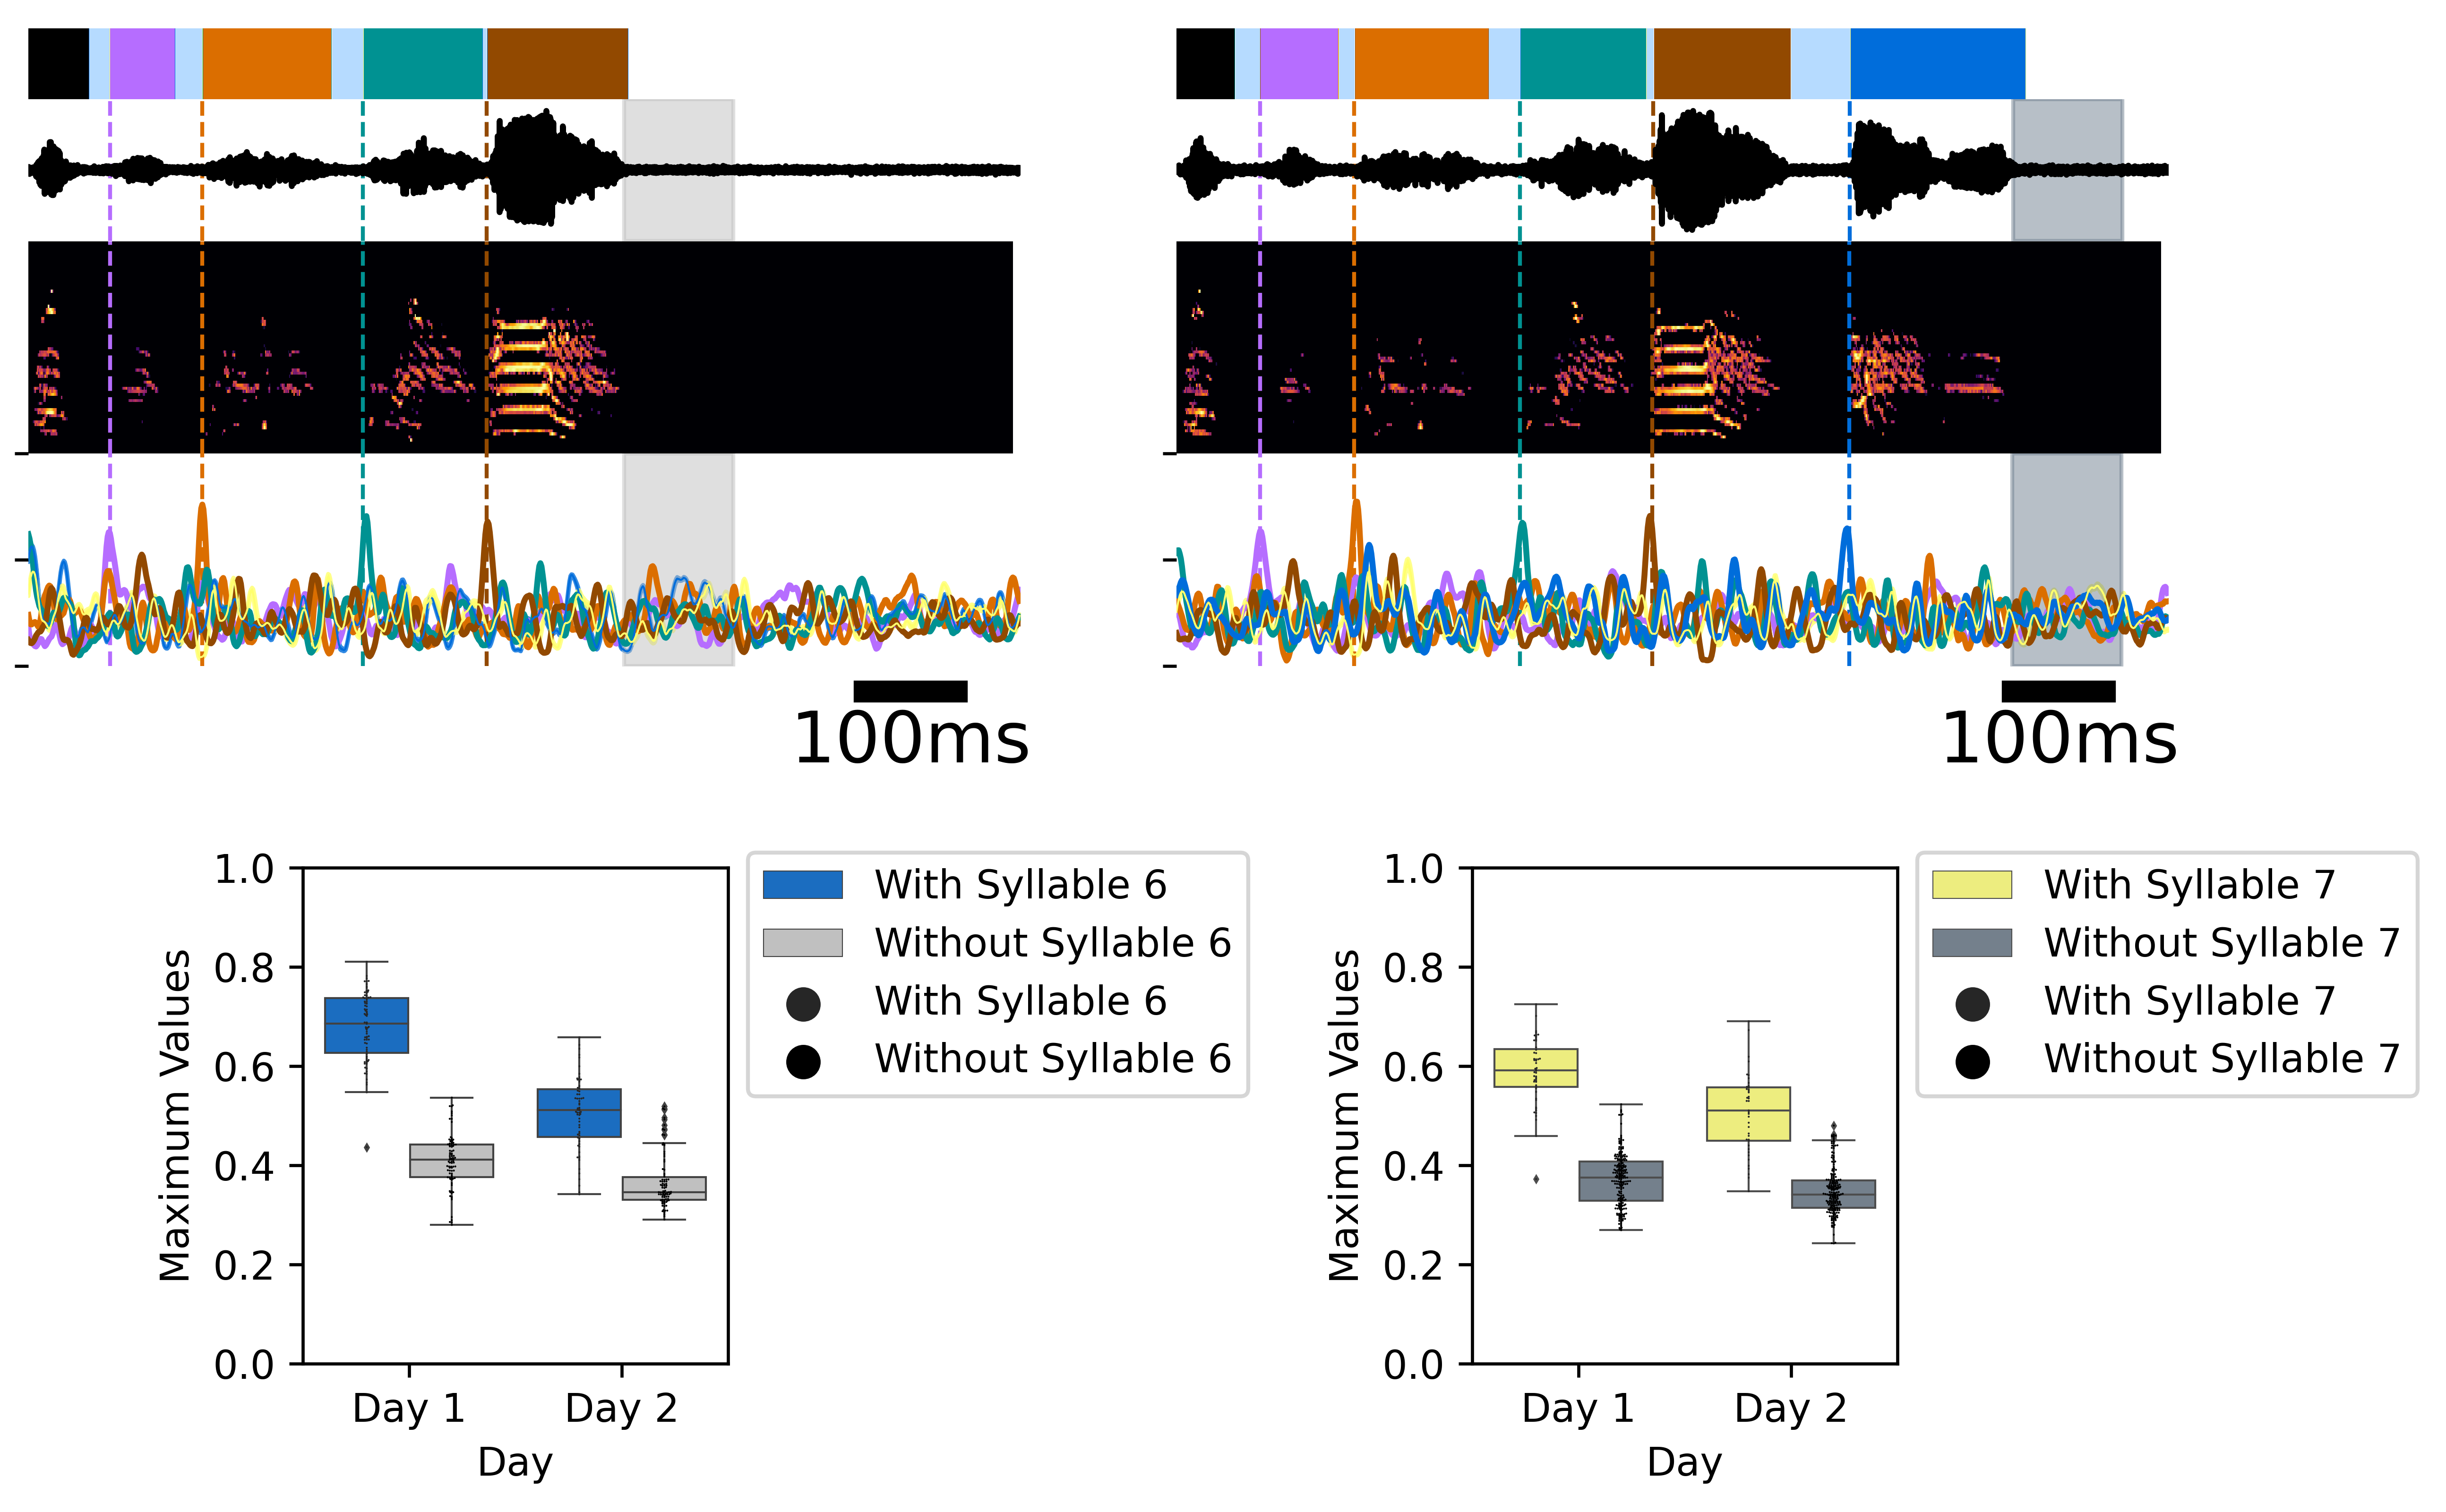

In [77]:
fig = plt.figure(figsize=(8.5, 7), dpi = 300)

freq_colors = [ 'tab:red', 'tab:blue', 'aqua', 'darkorange', 'cornflowerblue', 'tab:brown', 'tab:pink']


# Make the Subplots

# Exemplar Plot
predict_ax = fig.add_axes([0.07352941, 0.651787, 0.41176471, 0.10714], frame_on=False, xticklabels=[], ylim=(0, 1))
spect_ax = fig.add_axes([0.07352941, 0.7589298, 0.41176471, 0.10714], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))
pressure_ax = fig.add_axes([0.07352941, 0.86607, 0.41176471, 0.07142857], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))
label_ax = fig.add_axes([0.07352941, 0.93749857, 0.41176471, 0.03571429], frame_on=False, xticklabels=[]) #, ylim=(-1.2, 1.2))
# [left, bottom, width, height]



# Syllabel 2
branch_6_ax = fig.add_axes([0.18749983, 0.3, 0.17647, 0.25]) # old height = 0.21428571


# Plot Branch Example
predict_ax2 = fig.add_axes([0.55, 0.651787, 0.41176471, 0.10714], frame_on=False, xticklabels=[], ylim=(0, 1))
spect_ax2 = fig.add_axes([0.55, 0.7589298, 0.41176471, 0.10714], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))
pressure_ax2 = fig.add_axes([0.55, 0.86607, 0.41176471, 0.07142857], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))
label_ax2 = fig.add_axes([0.55, 0.93749857, 0.41176471, 0.03571429], frame_on=False, xticklabels=[]) #, ylim=(-1.2, 1.2))

# [left, bottom, width, height]

# Plot Branch Analysis Results

branch_7_ax = fig.add_axes([0.67278971, 0.3, 0.17647, 0.25])


#############################################
# Visualize the Branch Syllable 6

repeated_behave = repeat_motif_events(labels_array= sel_behave2)
label_ax.imshow(repeated_behave, cmap=cmap2, Norm=norm, aspect="auto")

# ax1.set_xlim(0,.5)


for start, label in zip(sel_rel_starts2, [2,3,4,5, 6, 7]):
        color = colors[label]
        pressure_ax.axvline(x=start/30000, linestyle='--', color=color, linewidth=line_width*2)
        predict_ax.axvline(x=start/30, linestyle='--', color=color, linewidth=line_width*2)
        spect_ax.axvline(x=start/30, linestyle='--', color=color, linewidth=line_width*2)
        
label_ax.get_yaxis().set_visible(False)  # Hide the Y axis
label_ax.get_xaxis().set_visible(False)  # Hide the Y axis

# Audio Pressure Waveform
timeseries_audio = sel_audio2/np.max(sel_audio2)
timeseries_length = len(timeseries_audio)/30000  # Convert x to seconds
pressure_ax.plot(np.arange(0, timeseries_length, 1/30000), timeseries_audio, color = "black")
pressure_ax.get_yaxis().set_visible(False)  # Hide the Y axis
pressure_ax.get_xaxis().set_visible(False)  # Hide the Y axis
    
pressure_ax.set_xlim(0,.901)


# Plot the Spectrogram
sns.heatmap(s3, xticklabels=False, yticklabels= False, cbar = False, cmap= 'inferno', ax = spect_ax)
spect_ax.invert_yaxis()
spect_ax.set_ylim((0,70))
spect_ax.set_xlim(0,901)


for predict_slam, color in zip(exemplar_predictions2, ['#B66DFF','#db6e00','#009292','#924900','#006DDB','#FFFF6D']):
    predict_ax.plot(np.arange(901), predict_slam/max_confidence, color = color)
    
# include the branch syllables
for predict_slam, color in zip(exemplar_branch_predictions2, ['#006DDB','#FFFF6D']):
    mean_predict_slame = np.mean(predict_slam, axis=0)
#     ax4.plot(np.arange(901), mean_predict_slame/max_confidence, color = color)
    
#     print(np.shape(predict_slam/max_confidence))
    plot_mean_w_std(trials=np.transpose(predict_slam/max_confidence), times=np.arange(901), times_labels=None, 
                    color = color, linewidth= line_width2,  ax=predict_ax)
    
    
predict_ax.set_ylim(0, 1)
predict_ax.set_xlim(0, 901)
# predict_ax2.get_yaxis().set_visible(False)  # Hide the Y axis
predict_ax.set_yticklabels([])
predict_ax.get_xaxis().set_visible(False)  # Hide the Y axis

#

# Add a Scale Bar
scalebar = AnchoredSizeBar(pressure_ax.transData,
                           .1, '100ms', 'center right', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=.3,
                           fontproperties=fontprops, bbox_to_anchor=(1.025, -.3),
                           bbox_transform=predict_ax.transAxes)

predict_ax.add_artist(scalebar)

#########
# Plot Branch Point Analysis Results

sns.boxplot(x="Day", y="Maximum Values",
                hue="State",
                data=full_results_6, palette= ['#006DDB', 'silver'], fliersize=line_width, 
            linewidth=line_width, ax = branch_6_ax);

sns.swarmplot(x="Day", y="Maximum Values",
              hue="State", 
              color="k", 
              dodge=True, size=.5,
              data=full_results_6, ax=branch_6_ax)

branch_6_ax.set_ylim(0, 1)
# overall_legend = syll_2_1.get_legend()
branch_6_ax.legend(loc= 'lower left', bbox_to_anchor=(1, .5, 1, 1))

time_buff = 50
expected_time_6 = int(np.mean(z017_absolute_relative_starts[4] / 30))
expected_before_6 = expected_time_6 - time_buff
expected_after_6 = expected_time_6 + time_buff

pressure_min, pressure_max = pressure_ax.get_ylim()
pressure_left, pressure_right = pressure_ax.get_xlim()
pressure_ax.fill_between(x = np.arange(pressure_left, pressure_right, .001), y1=pressure_min, y2=pressure_max, color = 'white')
pressure_ax.fill_between(x = np.arange(expected_before_6/1000, expected_after_6/1000, .001), y1=pressure_min, y2=pressure_max, color = 'silver', alpha=.5)
predict_ax.fill_between(x = np.arange(expected_before_6,expected_after_6), y1=0, y2=1, color = 'silver', alpha=.5)


#############################################
# Visualize the Branch Syllable 7

repeated_behave = repeat_motif_events(labels_array= sel_behave3)
label_ax2.imshow(repeated_behave, cmap=cmap2, Norm=norm, aspect="auto")

# ax1.set_xlim(0,.5)


for start, label in zip(sel_rel_starts3, [2,3,4,5, 6, 7]):
        color = colors[label]
#         print(start)
#         print(start/30000)
        pressure_ax2.axvline(x=start/30000, linestyle='--', color=color, linewidth=line_width*2)
        predict_ax2.axvline(x=start/30, linestyle='--', color=color, linewidth=line_width*2)
        spect_ax2.axvline(x=start/30, linestyle='--', color=color, linewidth=line_width*2)
        
label_ax2.get_yaxis().set_visible(False)  # Hide the Y axis
label_ax2.get_xaxis().set_visible(False)  # Hide the Y axis

# Audio Pressure Waveform
timeseries_audio = sel_audio3/np.max(sel_audio3)
timeseries_length = len(timeseries_audio)/30000  # Convert x to seconds
pressure_ax2.plot(np.arange(0, timeseries_length, 1/30000), timeseries_audio, color = "black")
pressure_ax2.get_yaxis().set_visible(False)  # Hide the Y axis
pressure_ax2.get_xaxis().set_visible(False)  # Hide the Y axis
    
pressure_ax2.set_xlim(0,.9)


# Plot the Spectrogram
sns.heatmap(s4, xticklabels=False, yticklabels= False, cbar = False, cmap= 'inferno', ax = spect_ax2)
spect_ax2.invert_yaxis()
spect_ax2.set_ylim((0,70))
spect_ax2.set_xlim(0,901)


for predict_slam, color in zip(exemplar_predictions3, ['#B66DFF','#db6e00','#009292','#924900','#006DDB','#FFFF6D']):
    predict_ax2.plot(np.arange(901), predict_slam/max_confidence, color = color)
    
    
# include the branch syllables
for predict_slam, color in zip(exemplar_branch_predictions3, ['#FFFF6D']):
    mean_predict_slame = np.mean(predict_slam, axis=0)
#     ax4.plot(np.arange(901), mean_predict_slame/max_confidence, color = color)
    
#     print(np.shape(predict_slam/max_confidence))
    plot_mean_w_std(trials=np.transpose(predict_slam/max_confidence), times=np.arange(901), times_labels=None, 
                    color = color, linewidth= line_width2,  ax=predict_ax2)
    

predict_ax2.set_ylim(0, 1)
predict_ax2.set_xlim(0, 901)
# predict_ax2.get_yaxis().set_visible(False)  # Hide the Y axis
predict_ax2.set_yticklabels([])
predict_ax2.get_xaxis().set_visible(False)  # Hide the Y axis



#

# Add a Scale Bar
scalebar = AnchoredSizeBar(pressure_ax2.transData,
                           .1, '100ms', 'center right', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=.3,
                           fontproperties=fontprops, bbox_to_anchor=(1.025, -.3),
                           bbox_transform=predict_ax2.transAxes)

predict_ax2.add_artist(scalebar)

#########
# Plot Branch Point Analysis Results

sns.boxplot(x="Day", y="Maximum Values",
                hue="State",
                data=full_results_7, palette= ['#FFFF6D', 'slategrey'], fliersize=line_width, 
            linewidth=line_width, ax = branch_7_ax);

sns.swarmplot(x="Day", y="Maximum Values",
              hue="State", 
              color="k", 
              dodge=True, size=.5,
              data=full_results_7, ax=branch_7_ax)

branch_7_ax.set_ylim(0, 1)
# overall_legend = syll_2_1.get_legend()
branch_7_ax.legend(loc= 'lower left', bbox_to_anchor=(1, .5, 1, 1))


time_buff = 50
expected_time_7 = int(np.mean(z017_absolute_relative_starts[5] / 30))
expected_before_7 = expected_time_7 - time_buff
expected_after_7 = expected_time_7 + time_buff


pressure_min, pressure_max = pressure_ax2.get_ylim()
pressure_left, pressure_right = pressure_ax2.get_xlim()
pressure_ax2.fill_between(x = np.arange(pressure_left, pressure_right, .001), y1=pressure_min, y2=pressure_max, color = 'white')
pressure_ax2.fill_between(x = np.arange(expected_before_7/1000, expected_after_7/1000, .001), y1=pressure_min, y2=pressure_max, color = 'slategrey', alpha=.5)
predict_ax2.fill_between(x = np.arange(expected_before_7,expected_after_7), y1=0, y2=1, color = 'slategrey', alpha=.5)


# # Save the Figure
# figure_name = 'Branch_Analysis' + 'z017_cb_pt1.svg'
# figure_type_folder = FIGURES_DIR / 'Branch_Analysis'

# # Check if Folder Path Exists
# if not figure_type_folder.exists():
#     figure_type_folder.mkdir(parents=True, exist_ok=True)

# figure_location = figure_type_folder / figure_name

# # fig.savefig(figure_location, format='png')
# fig.savefig(figure_location, dpi=300, papertype=None, format='svg')

plt.show()


/home/debrown/anaconda3/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/home/debrown/anaconda3/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:137: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/home/debrown/anaconda3/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:249: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later


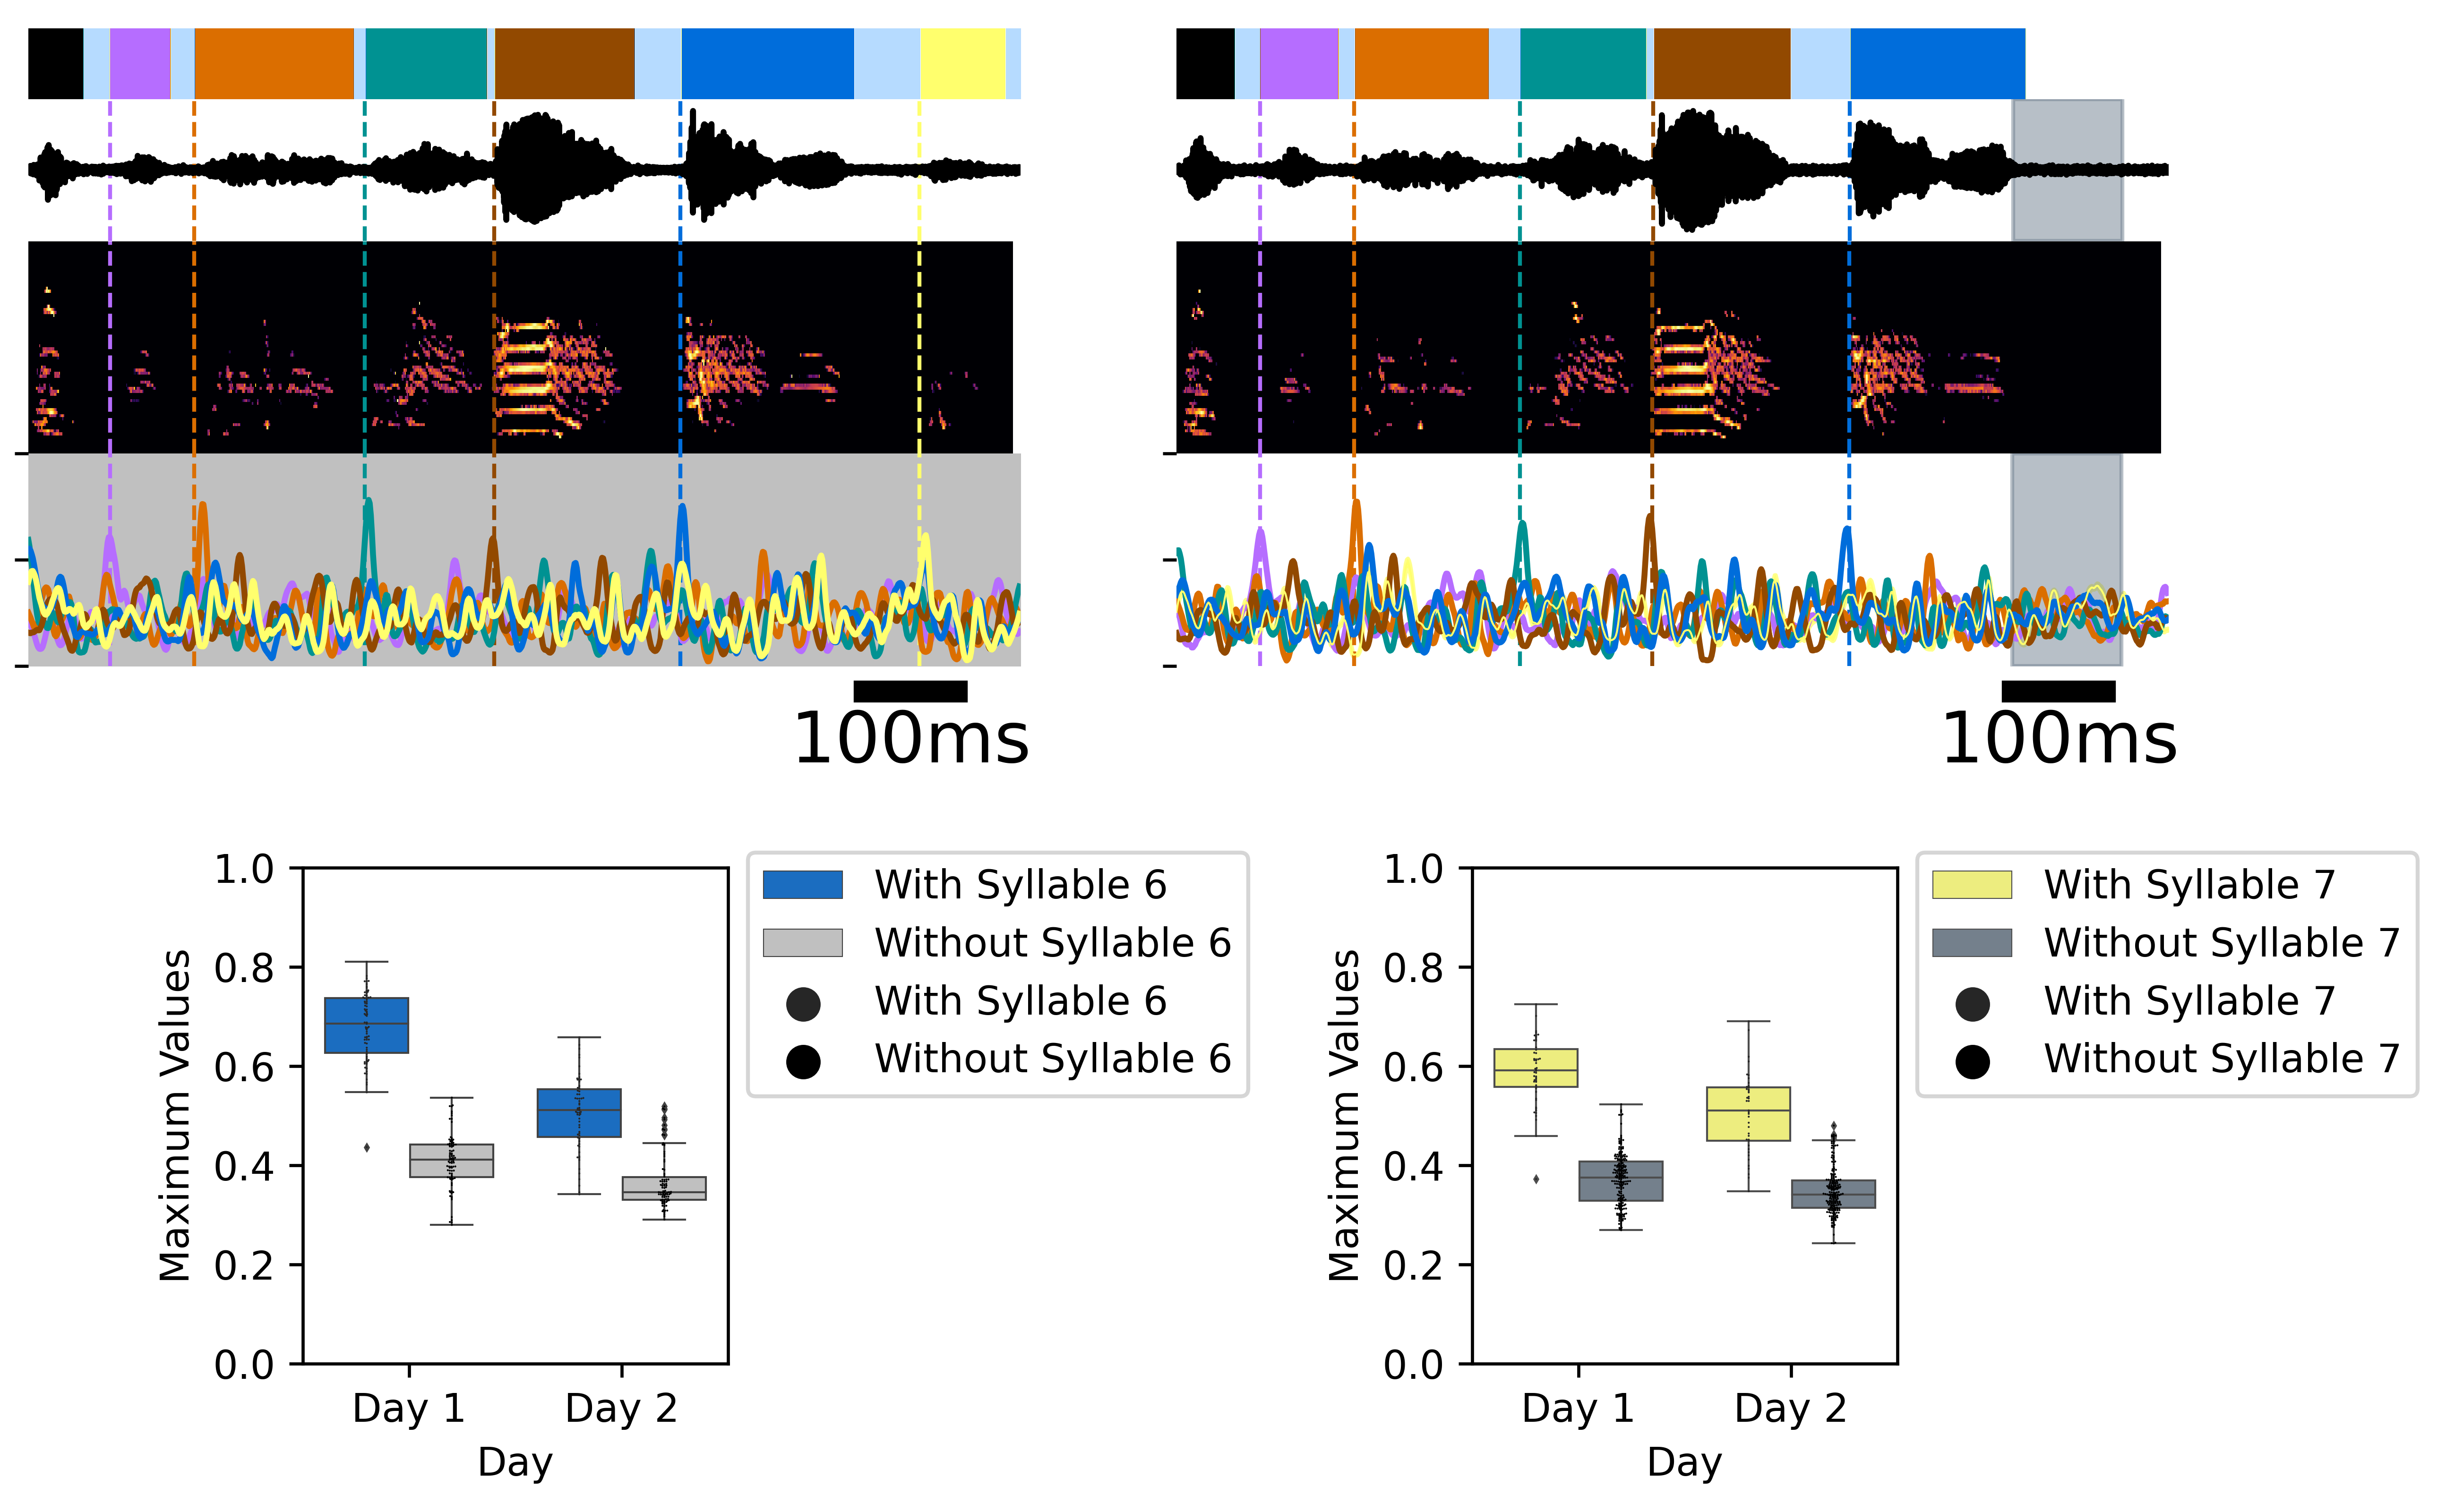

In [79]:
fig = plt.figure(figsize=(8.5, 7), dpi = 300)

freq_colors = [ 'tab:red', 'tab:blue', 'aqua', 'darkorange', 'cornflowerblue', 'tab:brown', 'tab:pink']


# Make the Subplots

# Exemplar Plot
predict_ax = fig.add_axes([0.07352941, 0.651787, 0.41176471, 0.10714], frame_on=False, xticklabels=[], ylim=(0, 1))
spect_ax = fig.add_axes([0.07352941, 0.7589298, 0.41176471, 0.10714], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))
pressure_ax = fig.add_axes([0.07352941, 0.86607, 0.41176471, 0.07142857], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))
label_ax = fig.add_axes([0.07352941, 0.93749857, 0.41176471, 0.03571429], frame_on=False, xticklabels=[]) #, ylim=(-1.2, 1.2))
# [left, bottom, width, height]



# Syllabel 2
branch_6_ax = fig.add_axes([0.18749983, 0.3, 0.17647, 0.25]) # old height = 0.21428571


# Plot Branch Example
predict_ax2 = fig.add_axes([0.55, 0.651787, 0.41176471, 0.10714], frame_on=False, xticklabels=[], ylim=(0, 1))
spect_ax2 = fig.add_axes([0.55, 0.7589298, 0.41176471, 0.10714], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))
pressure_ax2 = fig.add_axes([0.55, 0.86607, 0.41176471, 0.07142857], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))
label_ax2 = fig.add_axes([0.55, 0.93749857, 0.41176471, 0.03571429], frame_on=False, xticklabels=[]) #, ylim=(-1.2, 1.2))

# [left, bottom, width, height]

# Plot Branch Analysis Results

branch_7_ax = fig.add_axes([0.67278971, 0.3, 0.17647, 0.25])


#############################################
# Visualize the Branch Syllable 6

repeated_behave = repeat_motif_events(labels_array= sel_behave)
label_ax.imshow(repeated_behave, cmap=cmap2, Norm=norm, aspect="auto")

# ax1.set_xlim(0,.5)


for start, label in zip(sel_rel_starts, [2,3,4,5, 6, 7]):
        color = colors[label]
        pressure_ax.axvline(x=start/30000, linestyle='--', color=color, linewidth=line_width*2)
        predict_ax.axvline(x=start/30, linestyle='--', color=color, linewidth=line_width*2)
        spect_ax.axvline(x=start/30, linestyle='--', color=color, linewidth=line_width*2)
        
label_ax.get_yaxis().set_visible(False)  # Hide the Y axis
label_ax.get_xaxis().set_visible(False)  # Hide the Y axis

# Audio Pressure Waveform
timeseries_audio = sel_audio/np.max(sel_audio)
timeseries_length = len(timeseries_audio)/30000  # Convert x to seconds
pressure_ax.plot(np.arange(0, timeseries_length, 1/30000), timeseries_audio, color = "black")
pressure_ax.get_yaxis().set_visible(False)  # Hide the Y axis
pressure_ax.get_xaxis().set_visible(False)  # Hide the Y axis
    
pressure_ax.set_xlim(0,.901)


# Plot the Spectrogram
sns.heatmap(s2, xticklabels=False, yticklabels= False, cbar = False, cmap= 'inferno', ax = spect_ax)
spect_ax.invert_yaxis()
spect_ax.set_ylim((0,70))
spect_ax.set_xlim(0,901)


for predict_slam, color in zip(exemplar_predictions, ['#B66DFF','#db6e00','#009292','#924900','#006DDB','#FFFF6D']):
    predict_ax.plot(np.arange(901), predict_slam/max_confidence, color = color)
    
# # include the branch syllables
# for predict_slam, color in zip(exemplar_branch_predictions2, ['#006DDB','#FFFF6D']):
#     mean_predict_slame = np.mean(predict_slam, axis=0)
# #     ax4.plot(np.arange(901), mean_predict_slame/max_confidence, color = color)
    
# #     print(np.shape(predict_slam/max_confidence))
#     plot_mean_w_std(trials=np.transpose(predict_slam/max_confidence), times=np.arange(901), times_labels=None, 
#                     color = color, linewidth= line_width2,  ax=predict_ax)
    
    
predict_ax.set_ylim(0, 1)
predict_ax.set_xlim(0, 901)
# predict_ax2.get_yaxis().set_visible(False)  # Hide the Y axis
predict_ax.set_yticklabels([])
predict_ax.get_xaxis().set_visible(False)  # Hide the Y axis

#

# Add a Scale Bar
scalebar = AnchoredSizeBar(pressure_ax.transData,
                           .1, '100ms', 'center right', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=.3,
                           fontproperties=fontprops, bbox_to_anchor=(1.025, -.3),
                           bbox_transform=predict_ax.transAxes)

predict_ax.add_artist(scalebar)

#########
# Plot Branch Point Analysis Results

sns.boxplot(x="Day", y="Maximum Values",
                hue="State",
                data=full_results_6, palette= ['#006DDB', 'silver'], fliersize=line_width, 
            linewidth=line_width, ax = branch_6_ax);

sns.swarmplot(x="Day", y="Maximum Values",
              hue="State", 
              color="k", 
              dodge=True, size=.5,
              data=full_results_6, ax=branch_6_ax)

branch_6_ax.set_ylim(0, 1)
# overall_legend = syll_2_1.get_legend()
branch_6_ax.legend(loc= 'lower left', bbox_to_anchor=(1, .5, 1, 1))

time_buff = 50
expected_time_6 = int(np.mean(z017_absolute_relative_starts[4] / 30))
expected_before_6 = expected_time_6 - time_buff
expected_after_6 = expected_time_6 + time_buff

# Fill in Background of Select Plots (For Contrast)
pressure_min, pressure_max = pressure_ax.get_ylim()
pressure_left, pressure_right = pressure_ax.get_xlim()
pressure_ax.fill_between(x = np.arange(pressure_left, pressure_right, .001), y1=pressure_min, y2=pressure_max, color = 'white')


predict_ax.fill_between(x = np.arange(0,901), y1=0, y2=1, color = 'silver')

#############################################
# Visualize the Branch Syllable 7

repeated_behave = repeat_motif_events(labels_array= sel_behave3)
label_ax2.imshow(repeated_behave, cmap=cmap2, Norm=norm, aspect="auto")

# ax1.set_xlim(0,.5)


for start, label in zip(sel_rel_starts3, [2,3,4,5, 6, 7]):
        color = colors[label]
#         print(start)
#         print(start/30000)
        pressure_ax2.axvline(x=start/30000, linestyle='--', color=color, linewidth=line_width*2)
        predict_ax2.axvline(x=start/30, linestyle='--', color=color, linewidth=line_width*2)
        spect_ax2.axvline(x=start/30, linestyle='--', color=color, linewidth=line_width*2)
        
label_ax2.get_yaxis().set_visible(False)  # Hide the Y axis
label_ax2.get_xaxis().set_visible(False)  # Hide the Y axis

# Audio Pressure Waveform
timeseries_audio = sel_audio3/np.max(sel_audio3)
timeseries_length = len(timeseries_audio)/30000  # Convert x to seconds
pressure_ax2.plot(np.arange(0, timeseries_length, 1/30000), timeseries_audio, color = "black")
pressure_ax2.get_yaxis().set_visible(False)  # Hide the Y axis
pressure_ax2.get_xaxis().set_visible(False)  # Hide the Y axis
    
pressure_ax2.set_xlim(0,.9)


# Plot the Spectrogram
sns.heatmap(s4, xticklabels=False, yticklabels= False, cbar = False, cmap= 'inferno', ax = spect_ax2)
spect_ax2.invert_yaxis()
spect_ax2.set_ylim((0,70))
spect_ax2.set_xlim(0,901)


for predict_slam, color in zip(exemplar_predictions3, ['#B66DFF','#db6e00','#009292','#924900','#006DDB','#FFFF6D']):
    predict_ax2.plot(np.arange(901), predict_slam/max_confidence, color = color)
    
    
# include the branch syllables
for predict_slam, color in zip(exemplar_branch_predictions3, ['#FFFF6D']):
    mean_predict_slame = np.mean(predict_slam, axis=0)
#     ax4.plot(np.arange(901), mean_predict_slame/max_confidence, color = color)
    
#     print(np.shape(predict_slam/max_confidence))
    plot_mean_w_std(trials=np.transpose(predict_slam/max_confidence), times=np.arange(901), times_labels=None, 
                    color = color, linewidth= line_width2,  ax=predict_ax2)
    

predict_ax2.set_ylim(0, 1)
predict_ax2.set_xlim(0, 901)
# predict_ax2.get_yaxis().set_visible(False)  # Hide the Y axis
predict_ax2.set_yticklabels([])
predict_ax2.get_xaxis().set_visible(False)  # Hide the Y axis



#

# Add a Scale Bar
scalebar = AnchoredSizeBar(pressure_ax2.transData,
                           .1, '100ms', 'center right', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=.3,
                           fontproperties=fontprops, bbox_to_anchor=(1.025, -.3),
                           bbox_transform=predict_ax2.transAxes)

predict_ax2.add_artist(scalebar)

#########
# Plot Branch Point Analysis Results

sns.boxplot(x="Day", y="Maximum Values",
                hue="State",
                data=full_results_7, palette= ['#FFFF6D', 'slategrey'], fliersize=line_width, 
            linewidth=line_width, ax = branch_7_ax);

sns.swarmplot(x="Day", y="Maximum Values",
              hue="State", 
              color="k", 
              dodge=True, size=.5,
              data=full_results_7, ax=branch_7_ax)

branch_7_ax.set_ylim(0, 1)
# overall_legend = syll_2_1.get_legend()
branch_7_ax.legend(loc= 'lower left', bbox_to_anchor=(1, .5, 1, 1))


time_buff = 50
expected_time_7 = int(np.mean(z017_absolute_relative_starts[5] / 30))
expected_before_7 = expected_time_7 - time_buff
expected_after_7 = expected_time_7 + time_buff


pressure_min, pressure_max = pressure_ax2.get_ylim()
pressure_left, pressure_right = pressure_ax2.get_xlim()
pressure_ax2.fill_between(x = np.arange(pressure_left, pressure_right, .001), y1=pressure_min, y2=pressure_max, color = 'white')
pressure_ax2.fill_between(x = np.arange(expected_before_7/1000, expected_after_7/1000, .001), y1=pressure_min, y2=pressure_max, color = 'slategrey', alpha=.5)
predict_ax2.fill_between(x = np.arange(expected_before_7,expected_after_7), y1=0, y2=1, color = 'slategrey', alpha=.5)


# # Save the Figure
# figure_name = 'Branch_Analysis' + 'z017_cb_pt2.svg'
# figure_type_folder = FIGURES_DIR / 'Branch_Analysis'

# # Check if Folder Path Exists
# if not figure_type_folder.exists():
#     figure_type_folder.mkdir(parents=True, exist_ok=True)

# figure_location = figure_type_folder / figure_name

# # fig.savefig(figure_location, format='png')
# fig.savefig(figure_location, dpi=300, papertype=None, format='svg')

plt.show()
